# Part 2 - Question 4

## Question: 
Do specific star ratings incite more reviews? For example, are customers more
likely to write some type of review after seeing a series of low star rating??

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

## Hair Dryer

In [35]:
hair_dryer_df = pd.read_csv('Problem_C_Data/hair_dryer.tsv', sep='\t')
hair_dryer_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,8/31/2015
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,8/31/2015
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015


In [36]:
# 11,470 sample data with 15 unqiue features
hair_dryer_df.shape

(11470, 15)

In [37]:
# Describe the data
hair_dryer_df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,1.147000e+04,1.147000e+04,11470.000000,11470.000000,11470.000000
mean,2.815122e+07,4.846338e+08,4.116042,2.179076,2.563296
std,1.523877e+07,2.873240e+08,1.300333,14.241304,15.382528
min,1.246400e+04,4.239600e+05,1.000000,0.000000,0.000000
25%,1.491441e+07,2.351060e+08,4.000000,0.000000,0.000000
50%,2.707123e+07,4.867740e+08,5.000000,0.000000,0.000000
75%,4.233644e+07,7.322523e+08,5.000000,1.000000,1.000000
max,5.309637e+07,9.994366e+08,5.000000,499.000000,575.000000


In [38]:
# Print the unique values in all columns
for column in hair_dryer_df.columns:
    print(f"Column: {column}, unique values {hair_dryer_df[column].unique() if len(hair_dryer_df[column].unique()) < 100 else 'MORE THAN 100 VALUES'}")

Column: marketplace, unique values ['US']
Column: customer_id, unique values MORE THAN 100 VALUES
Column: review_id, unique values MORE THAN 100 VALUES
Column: product_id, unique values MORE THAN 100 VALUES
Column: product_parent, unique values MORE THAN 100 VALUES
Column: product_title, unique values MORE THAN 100 VALUES
Column: product_category, unique values ['Beauty']
Column: star_rating, unique values [5 4 1 3 2]
Column: helpful_votes, unique values MORE THAN 100 VALUES
Column: total_votes, unique values MORE THAN 100 VALUES
Column: vine, unique values ['N' 'Y']
Column: verified_purchase, unique values ['Y' 'N']
Column: review_headline, unique values MORE THAN 100 VALUES
Column: review_body, unique values MORE THAN 100 VALUES
Column: review_date, unique values MORE THAN 100 VALUES


### Verify Total Reviews = Review Headline = Review Body

In [39]:
# Verify review headline and body don't contain any NA values

# Check if any values in 'review_body' are empty
review_body_empty = hair_dryer_df['review_headline'].isna().any()

# Check if any values in 'headline' are empty
headline_empty = hair_dryer_df['review_body'].isna().any()

# Count the number of empty values in 'review_body' and 'headline'
review_body_empty_count = hair_dryer_df['review_body'].isna().sum()
headline_empty_count = hair_dryer_df['review_headline'].isna().sum()

print("Headline has empty values:", headline_empty)
print("Number of empty values in Headline:", headline_empty_count)

print("Review Body has empty values:", review_body_empty)
print("Number of empty values in Review Body:", review_body_empty_count)

Headline has empty values: False
Number of empty values in Headline: 2
Review Body has empty values: True
Number of empty values in Review Body: 0


In [40]:
# Actual Empty Values
hair_dryer_df[hair_dryer_df['review_body'].isna() | hair_dryer_df['review_headline'].isna()]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
273,US,51177255,R2TW4FSXQ60M75,B001UE7D2I,127343313,andis 1875-watt tourmaline ceramic ionic styli...,Beauty,5,0,0,N,Y,NaN,Used once - recently cut hair - Sure to use it...,8/9/2015
2433,US,11212444,R24Y12M6JKTTQM,B00MEBKQ8E,646149518,"panasonic hair dryer nano care, vivid pink, 1 ...",Beauty,4,0,1,N,Y,NaN,It is very nice ! Motor sounds are not cheep d...,2/17/2015


### Data Findings
- All our data is from the US market
- Customer ID can be used to keep track of customers in all three datasets (unique to a single customer)
- marketplace, product_category, star_rating, vine, verified_purchases are all discrete features
- We either have review_body or review_headline for all of the data points
- **product_parent** should be used to aggregate data to see family of products' 

## Ideas (CHANGE IN THE FINAL COMMIT)
- Since we want to see if continous star ratings affect the review, let's sort the dataset by the review date.
- Seperate ratings based on the cluster of ratings
- Product description could be something that the compnay could make use of

In [41]:
# Convert review_date to datetime object
hair_dryer_df['review_date'] = pd.to_datetime(hair_dryer_df['review_date'])

# Add the year and month column (hd = hair dryer) [Year (2002 - 2015) ]
hair_dryer_df['review_year'] = hair_dryer_df['review_date'].dt.year
hair_dryer_df['review_month'] = hair_dryer_df['review_date'].dt.month

hair_dryer_df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_year,review_month
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,2015-08-31,2015,8
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",2015-08-31,2015,8
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,2015-08-31,2015,8
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,2015-08-31,2015,8
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,2015-08-31,2015,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11465,US,35599734,R2O50YNP83CG34,B000065DJY,919751065,revlon 1875w volumizing hair dryer,Beauty,5,14,18,N,N,great hair!,"I just purchased this dryer, and I really like...",2002-08-21,2002,8
11466,US,43977044,R2JQPUYU65C4QD,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,1,26,32,N,N,Disappointment with dryer,I purchased it because it was supposed to be q...,2002-08-13,2002,8
11467,US,37733836,R3GO6L5PWBS0IW,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,5,4,4,N,Y,The best dryer!!!,"I love this dryer not only is it QUIET, it rea...",2002-07-13,2002,7
11468,US,38947355,R3JMGN42OJCL97,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,5,78,87,N,N,Excellent for fine/limp hair,This hairdryer far exceeded my expection for<B...,2002-04-20,2002,4


### Star Ratings Vs Number of Reviews (Grouped by Year)

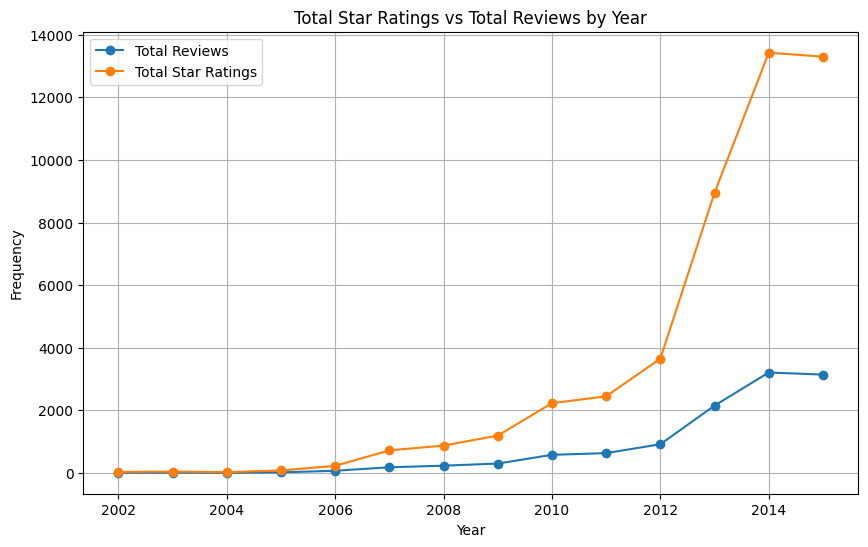

In [42]:
# Group by year and count occurrences of star ratings and reviews
grouped_hd_data_year = hair_dryer_df.groupby('review_year').size().reset_index(name='Total_Reviews')
grouped_hd_ratings_year = hair_dryer_df.groupby('review_year')['star_rating'].sum().reset_index(name='Total_star_ratings')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(grouped_hd_data_year['review_year'], grouped_hd_data_year['Total_Reviews'], label='Total Reviews', marker='o')
plt.plot(grouped_hd_ratings_year['review_year'], grouped_hd_ratings_year['Total_star_ratings'], label='Total Star Ratings', marker='o')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Total Star Ratings vs Total Reviews by Year')
plt.legend()
plt.grid(True)

plt.show()

In [43]:
# Get the correlation between Total Reviews and Total Start Ratings (Grouped by Year)
correlation = grouped_hd_data_year['Total_Reviews'].corr(grouped_hd_ratings_year['Total_star_ratings'])

print("Correlation between Total Star Ratings and Total Reviews:", correlation)

Correlation between Total Star Ratings and Total Reviews: 0.9998304230054623


#### Low Ratings Vs High Ratings and How they affect Number of Reviews

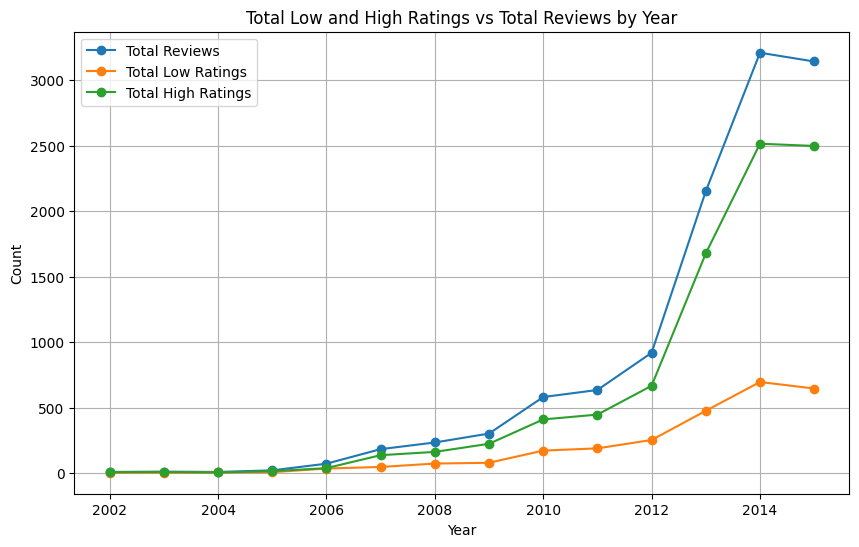

Correlation between Total Low Ratings and Total Reviews: 0.9957513709523006
Correlation between Total High Ratings and Total Reviews: 0.9997009996235546


In [44]:
low_rating_threshold = 3
high_rating_threshold = 4

# Filter data for low and high ratings
low_ratings_hd_year = hair_dryer_df[hair_dryer_df['star_rating'] <= low_rating_threshold]
high_ratings_hd_year = hair_dryer_df[hair_dryer_df['star_rating'] >= high_rating_threshold]

# Group low ratings and high by year and calculate total reviews
grouped_low_hd_ratings = low_ratings_hd_year.groupby('review_year').size().reset_index(name='Total_Low_Ratings')
grouped_high_hd_ratings = high_ratings_hd_year.groupby('review_year').size().reset_index(name='Total_High_Ratings')

plt.figure(figsize=(10, 6))
plt.plot(grouped_hd_data_year['review_year'], grouped_hd_data_year['Total_Reviews'], label='Total Reviews', marker='o')
plt.plot(grouped_low_hd_ratings['review_year'], grouped_low_hd_ratings['Total_Low_Ratings'], label='Total Low Ratings', marker='o')
plt.plot(grouped_high_hd_ratings['review_year'], grouped_high_hd_ratings['Total_High_Ratings'], label='Total High Ratings', marker='o')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Low and High Ratings vs Total Reviews by Year')
plt.legend()
plt.grid(True)

plt.show()

# Calculate the correlation between total low ratings, total high rating and total reviews
correlation_low = grouped_low_hd_ratings['Total_Low_Ratings'].corr(grouped_hd_data_year['Total_Reviews'])
correlation_high = grouped_high_hd_ratings['Total_High_Ratings'].corr(grouped_hd_data_year['Total_Reviews'])

print("Correlation between Total Low Ratings and Total Reviews:", correlation_low)
print("Correlation between Total High Ratings and Total Reviews:", correlation_high)

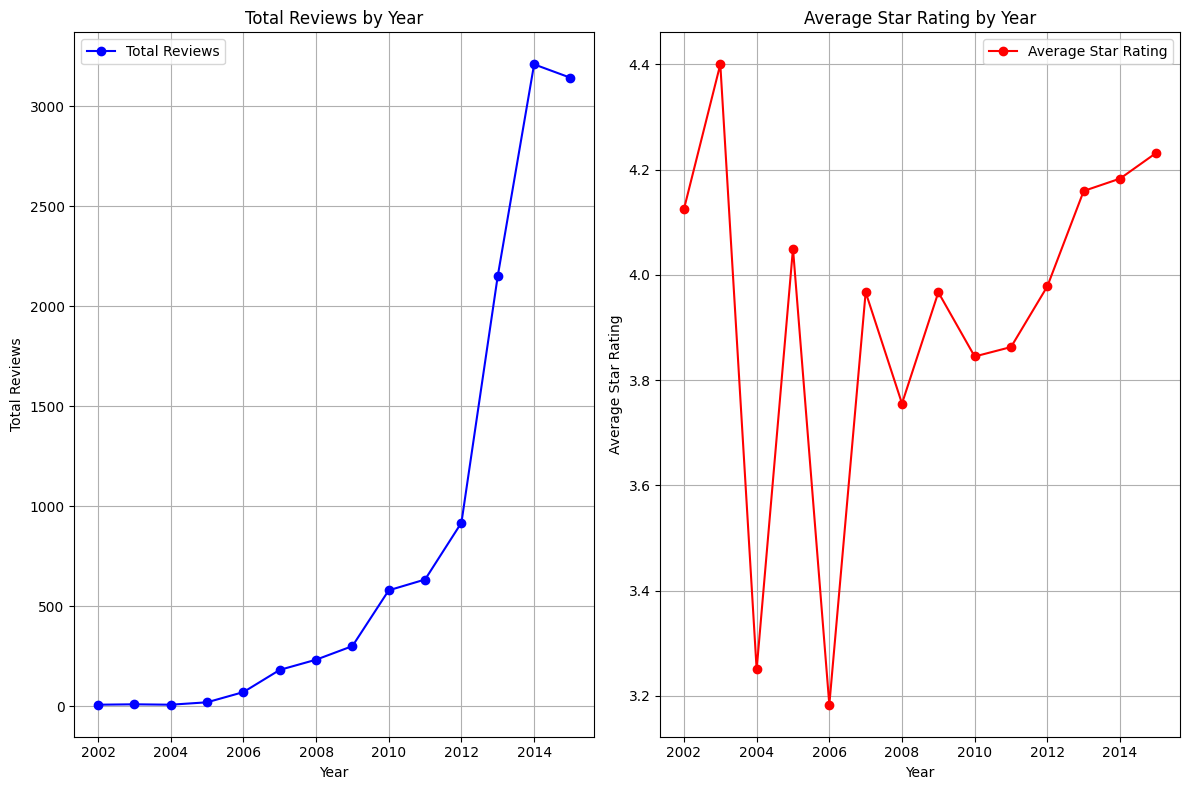

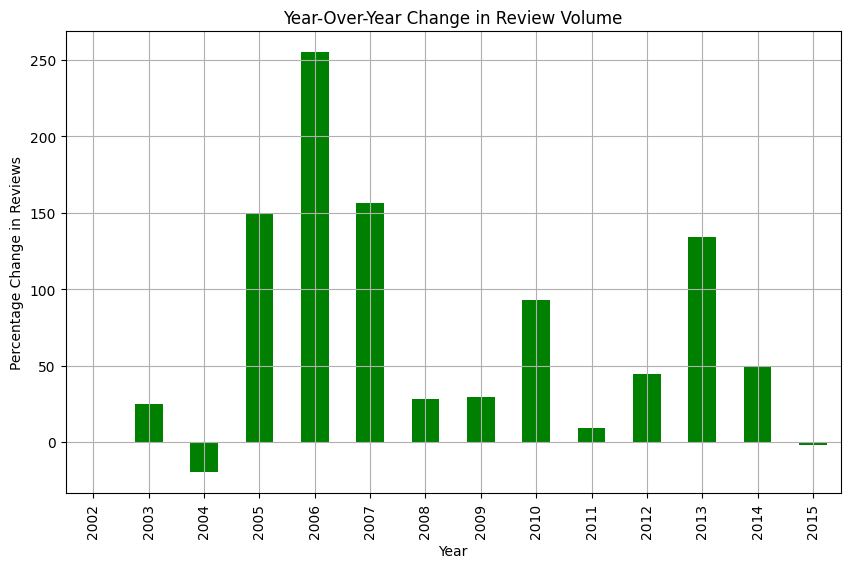

In [45]:
# Group data by year and calculate total reviews and average star rating
grouped_hd_data_year = hair_dryer_df.groupby('review_year').agg({
    'review_id': 'size',
    'star_rating': 'mean'
}).rename(columns={'review_id': 'Total_Reviews', 'star_rating': 'Average_Star_Rating'})

grouped_hd_data_year['Review_Change'] = grouped_hd_data_year['Total_Reviews'].pct_change() * 100

# Plotting the results
plt.figure(figsize=(12, 8))

# Total reviews by year
ax1 = plt.subplot(1, 2, 1)
grouped_hd_data_year['Total_Reviews'].plot(ax=ax1, label='Total Reviews', marker='o', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Reviews')
ax1.set_title('Total Reviews by Year')
ax1.legend()
ax1.grid(True)

# Average star rating by year
ax2 = plt.subplot(1, 2, 2)
grouped_hd_data_year['Average_Star_Rating'].plot(ax=ax2, label='Average Star Rating', marker='o', color='red')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Star Rating')
ax2.set_title('Average Star Rating by Year')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# percentage change in review volume
plt.figure(figsize=(10, 6))
grouped_hd_data_year['Review_Change'].plot(kind='bar', color='green')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Reviews')
plt.title('Year-Over-Year Change in Review Volume')
plt.grid(True)
plt.show()

### Start Ratings Vs Number of Reviews (Grouped by Month)

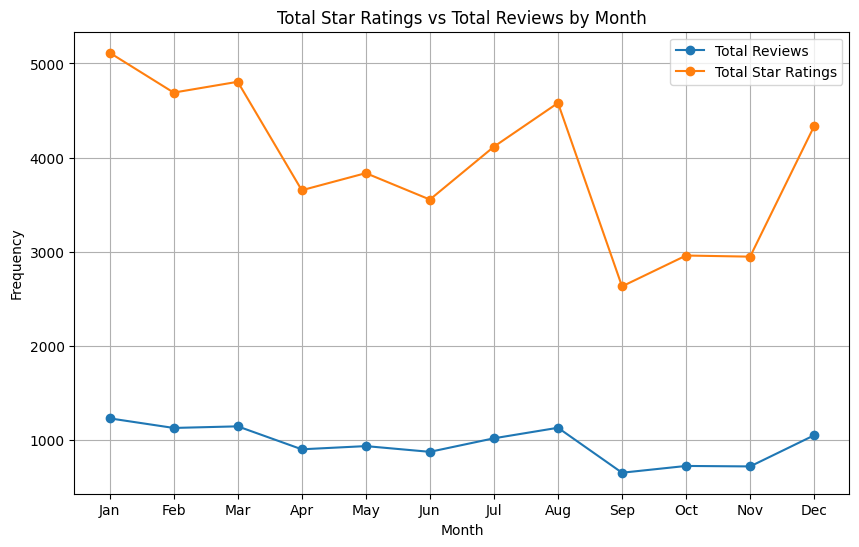

In [46]:
# Group by month and count occurrences of star ratings and reviews
grouped_hd_data_month = hair_dryer_df.groupby('review_month').size().reset_index(name='Total_Reviews')
grouped_hd_ratings_month = hair_dryer_df.groupby('review_month')['star_rating'].sum().reset_index(name='Total_star_ratings')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(grouped_hd_data_month['review_month'], grouped_hd_data_month['Total_Reviews'], label='Total Reviews', marker='o')
plt.plot(grouped_hd_ratings_month['review_month'], grouped_hd_ratings_month['Total_star_ratings'], label='Total Star Ratings', marker='o')

plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.title('Total Star Ratings vs Total Reviews by Month')
plt.legend()
plt.grid(True)

plt.show()

In [47]:
# Get the correlation between Total Reviews and Total Start Ratings (Grouped by Month)
correlation = grouped_hd_data_month['Total_Reviews'].corr(grouped_hd_ratings_month['Total_star_ratings'])

print("Correlation between Total Star Ratings and Total Reviews:", correlation)

Correlation between Total Star Ratings and Total Reviews: 0.9983707083320439


#### Low Ratings Vs High Ratings and How they affect Number of Reviews

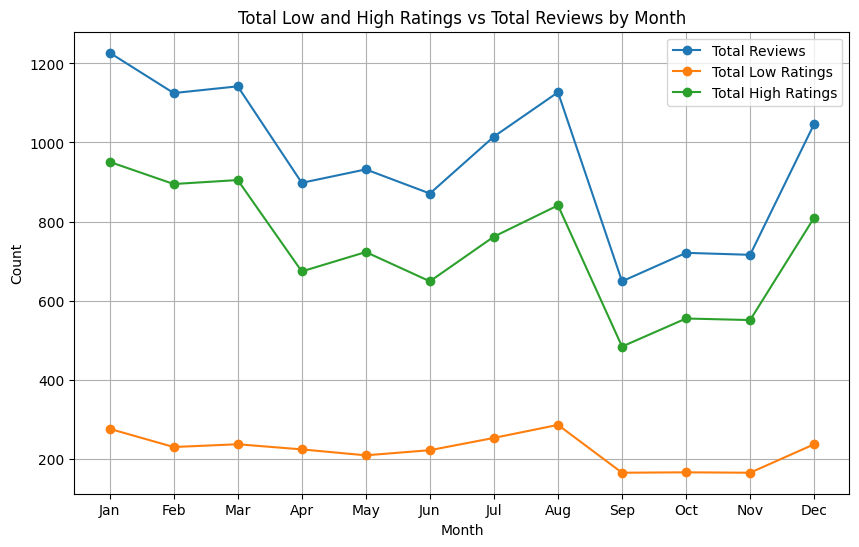

Correlation between Total Low Ratings and Total Reviews: 0.9102130149602354
Correlation between Total High Ratings and Total Reviews: 0.9939307336925539


In [48]:
low_rating_threshold = 3
high_rating_threshold = 4

# Filter data for low and high ratings
low_ratings_hd_month = hair_dryer_df[hair_dryer_df['star_rating'] <= low_rating_threshold]
high_ratings_hd_month = hair_dryer_df[hair_dryer_df['star_rating'] >= high_rating_threshold]

# Group low ratings and high by month and calculate total reviews
grouped_low_hd_ratings_month = low_ratings_hd_month.groupby('review_month').size().reset_index(name='Total_Low_Ratings')
grouped_high_hd_ratings_month = high_ratings_hd_month.groupby('review_month').size().reset_index(name='Total_High_Ratings')

plt.figure(figsize=(10, 6))
plt.plot(grouped_hd_data_month['review_month'], grouped_hd_data_month['Total_Reviews'], label='Total Reviews', marker='o')
plt.plot(grouped_low_hd_ratings_month['review_month'], grouped_low_hd_ratings_month['Total_Low_Ratings'], label='Total Low Ratings', marker='o')
plt.plot(grouped_high_hd_ratings_month['review_month'], grouped_high_hd_ratings_month['Total_High_Ratings'], label='Total High Ratings', marker='o')

plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.title('Total Low and High Ratings vs Total Reviews by Month')
plt.legend()
plt.grid(True)

plt.show()

# Calculate the correlation between total low ratings, total high rating and total reviews
correlation_low = grouped_low_hd_ratings_month['Total_Low_Ratings'].corr(grouped_hd_data_month['Total_Reviews'])
correlation_high = grouped_high_hd_ratings_month['Total_High_Ratings'].corr(grouped_hd_data_month['Total_Reviews'])

print("Correlation between Total Low Ratings and Total Reviews:", correlation_low)
print("Correlation between Total High Ratings and Total Reviews:", correlation_high)

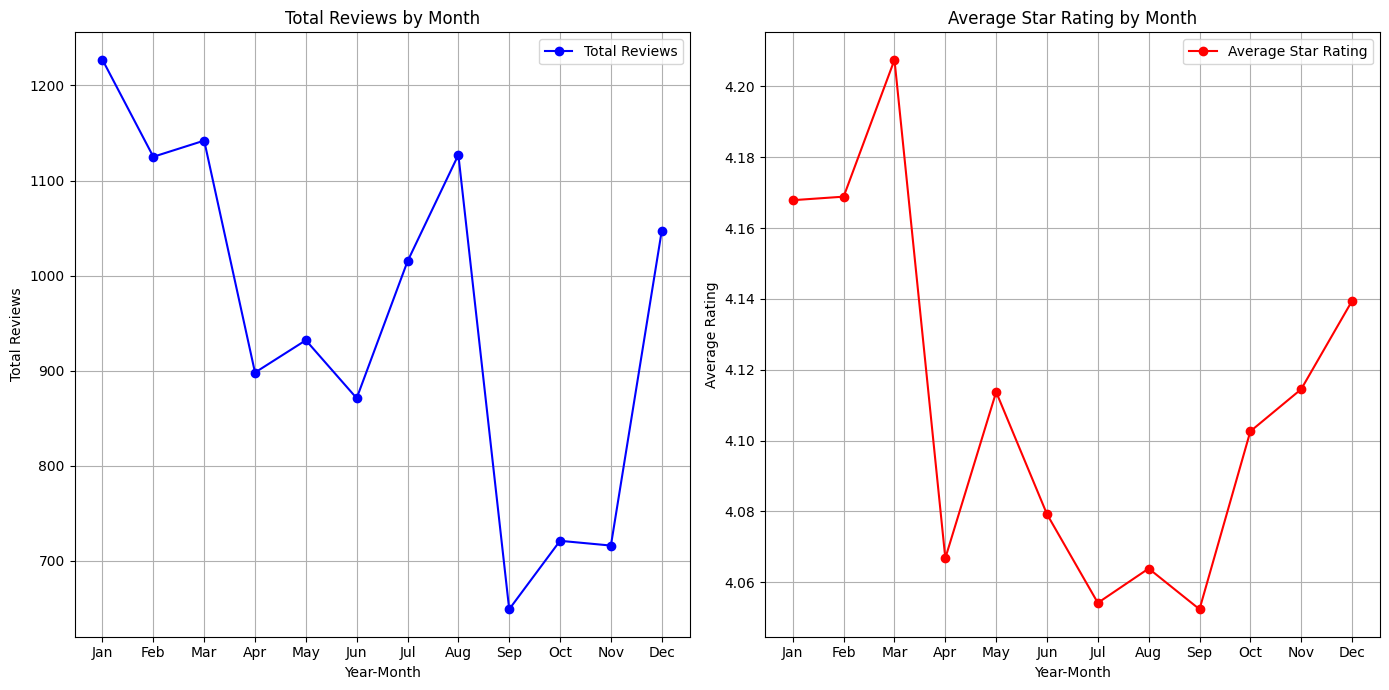

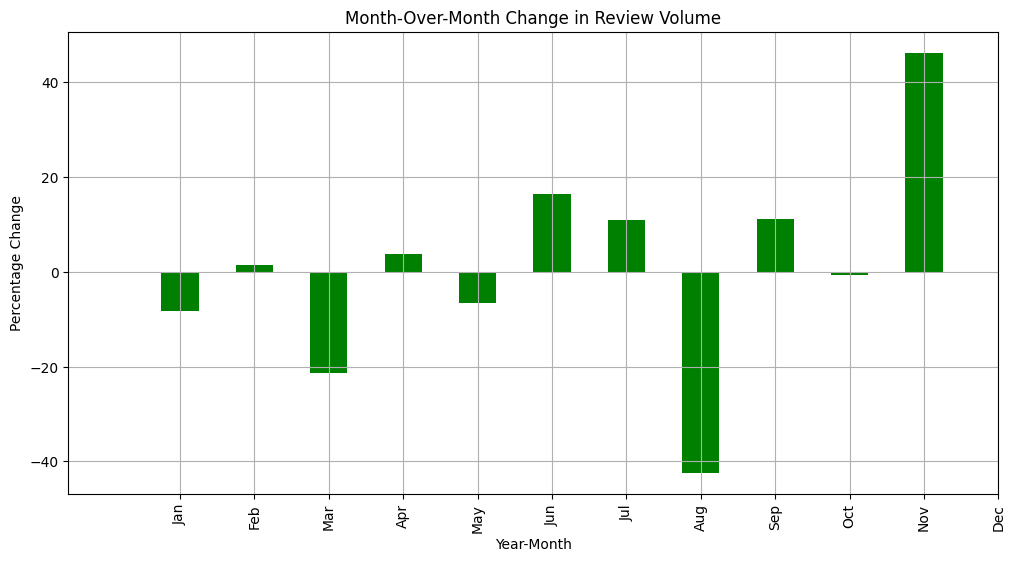

In [49]:
# Aggregate data to calculate total reviews and average star rating per month
grouped_hd_data_month = hair_dryer_df.groupby('review_month').agg({
    'review_id': 'size',
    'star_rating': 'mean' 
}).rename(columns={'review_id': 'Total_Reviews', 'star_rating': 'Average_Star_Rating'})

grouped_hd_data_month['Review_Change'] = grouped_hd_data_month['Total_Reviews'].pct_change() * 100

plt.figure(figsize=(14, 7))

# Total reviews by month
plt.subplot(1, 2, 1)
grouped_hd_data_month['Total_Reviews'].plot(marker='o', color='blue', label='Total Reviews')
plt.title('Total Reviews by Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Reviews')
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.legend()
plt.grid(True)

# Average star rating by month
plt.subplot(1, 2, 2)
grouped_hd_data_month['Average_Star_Rating'].plot(marker='o', color='red', label='Average Star Rating')
plt.title('Average Star Rating by Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# plot the percentage change in review volume
plt.figure(figsize=(12, 6))
grouped_hd_data_month['Review_Change'].plot(kind='bar', color='green')
plt.title('Month-Over-Month Change in Review Volume')
plt.xlabel('Year-Month')
plt.ylabel('Percentage Change')
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.grid(True)
plt.show()

### How does Low Rating and High Rating streaks affect next Rating Type

In [50]:
hair_dryer_df.sort_values('review_date', inplace=True)

hair_dryer_df['rating_type'] = pd.cut(hair_dryer_df['star_rating'], bins=[0, 2, 3.9, 5], labels=['low', 'neutral', 'high'])

def detect_streaks(series, window_size, label):
    streaks = [False] * len(series)
    for i in range(len(series) - window_size + 1):
        window = series.iloc[i:i+window_size]
        if all(window == label):
            streaks[i + window_size - 1] = True
    return pd.Series(streaks, index=series.index)

window_size = 3  # Define the size of the window to consider for a sequence
hair_dryer_df['low_streak'] = detect_streaks(hair_dryer_df['rating_type'], window_size, 'low')
hair_dryer_df['high_streak'] = detect_streaks(hair_dryer_df['rating_type'], window_size, 'high')

hair_dryer_df['next_rating_type'] = hair_dryer_df['rating_type'].shift(-1)

summary_df = hair_dryer_df.groupby(['low_streak', 'high_streak', 'next_rating_type']).size().unstack(fill_value=0)

print(summary_df)

next_rating_type        low  neutral  high
low_streak high_streak                    
False      False        910      555  4719
           True         752      437  4051
True       False          9        6    30
           True           0        0     0


In [51]:
# streak detection and subsequent ratings as before
hair_dryer_df['low_streak'] = detect_streaks(hair_dryer_df['rating_type'], window_size, 'low')
hair_dryer_df['high_streak'] = detect_streaks(hair_dryer_df['rating_type'], window_size, 'high')
hair_dryer_df['next_rating_type'] = hair_dryer_df['rating_type'].shift(-1)

grouped_by_time = hair_dryer_df.groupby(['review_year', 'review_month', 'low_streak', 'high_streak', 'next_rating_type']).size().unstack(fill_value=0)
print(grouped_by_time)

next_rating_type                                 low  neutral  high
review_year review_month low_streak high_streak                    
2002        1            False      False          0        0     0
                                    True           0        0     0
                         True       False          0        0     0
                                    True           0        0     0
            2            False      False          0        0     0
...                                              ...      ...   ...
2015        11           True       True           0        0     0
            12           False      False          0        0     0
                                    True           0        0     0
                         True       False          0        0     0
                                    True           0        0     0

[672 rows x 3 columns]


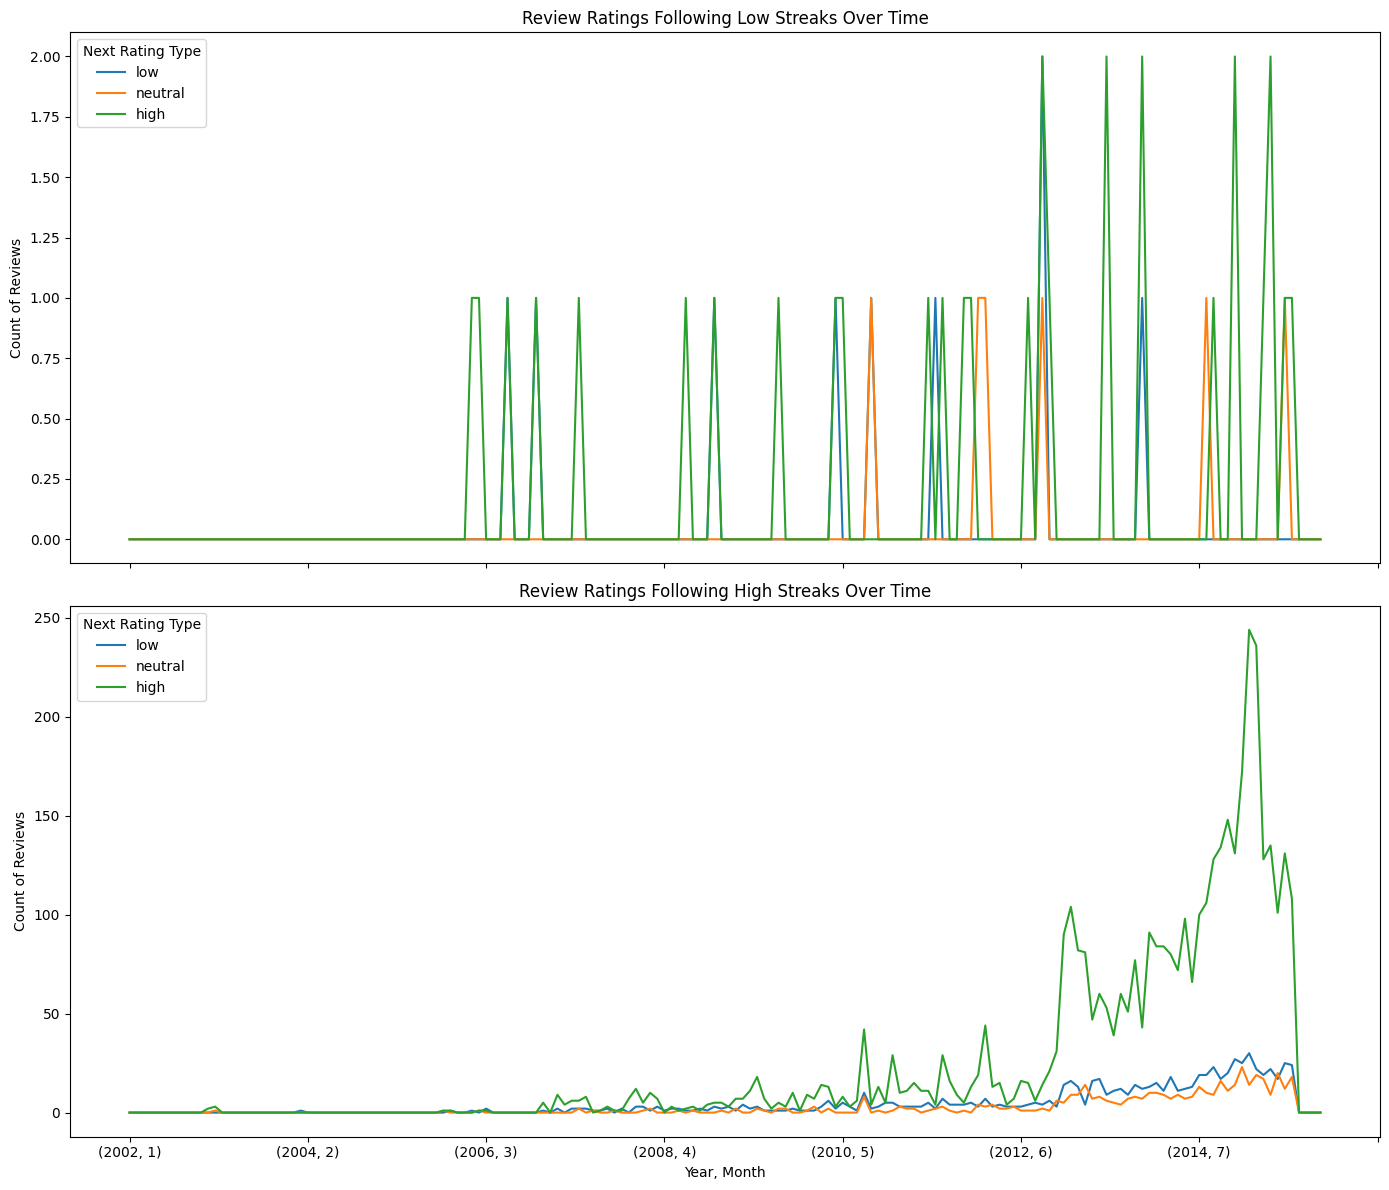

In [52]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), sharex=True)

# Plot total counts of reviews following low streaks
grouped_by_time.xs((True, False), level=('low_streak', 'high_streak'))[['low', 'neutral', 'high']].plot(
    ax=axs[0], title='Review Ratings Following Low Streaks Over Time'
)
axs[0].set_ylabel('Count of Reviews')
axs[0].legend(title='Next Rating Type')

# Plot total counts of reviews following high streaks
grouped_by_time.xs((False, True), level=('low_streak', 'high_streak'))[['low', 'neutral', 'high']].plot(
    ax=axs[1], title='Review Ratings Following High Streaks Over Time'
)
axs[1].set_xlabel('Year, Month')
axs[1].set_ylabel('Count of Reviews')
axs[1].legend(title='Next Rating Type')

plt.tight_layout()
plt.show()

#### Conclusion
- **Low Streak**: Indicates a sequence of low star ratings (≤2 stars)
- **High Streak**:  Indicates a sequence of high star ratings (≥4 stars)
- No Streaks: Most reviews are positive (4,719 high), suggesting general customer satisfaction.
- 
High Streaks: A small decrease in positive reviews (4,051 high) compared to no streaks, indicating that positive feedback tends to encourage more positive feedback
- 
Low Streaks: Despite preceding low ratings, the majority of following reviews are positive (30 high), suggesting that negative reviews do not significantly deter positive subsequent feedba
- .
Both Low and High Streaks: No instances found, as expected.
.


## Pacifier

In [54]:
pacifier_df = pd.read_csv('Problem_C_Data/pacifier.tsv', sep='\t')
pacifier_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,40626522,R1A3ZUBR8TSAKY,B00793CZAE,572944212,"mary meyer wubbanub plush pacifier, lamb",Baby,5,0,0,N,Y,Love this!,Perfect match for the Gund Huggybuddy I bought...,8/31/2015
1,US,16290022,RLJNYBK4FGBYX,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0,0,N,Y,Love 💕,My little girl love this paci contraption!,8/31/2015
2,US,10216509,R26QCW75C4JDOK,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,Five Stars,My son loves this one and will only sleep if h...,8/31/2015
3,US,114040,R2E7N0TVLUHUDR,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,Five Stars,Perfect,8/31/2015
4,US,27971579,R1SO9VMCIGZX3U,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0,0,N,Y,Five Stars,Amazing addition to the nursery!,8/31/2015


In [55]:
# 18,939 sample data with 15 unqiue features
pacifier_df.shape

(18939, 15)

In [56]:
# Describe the data
pacifier_df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,1.893900e+04,1.893900e+04,18939.000000,18939.000000,18939.000000
mean,2.622689e+07,4.992397e+08,4.304557,0.827182,1.131158
std,1.475483e+07,2.701964e+08,1.190426,5.735581,6.557319
min,1.000900e+04,7.238490e+05,1.000000,0.000000,0.000000
25%,1.387152e+07,2.877536e+08,4.000000,0.000000,0.000000
50%,2.417323e+07,4.677927e+08,5.000000,0.000000,0.000000
75%,3.963881e+07,7.136190e+08,5.000000,0.000000,1.000000
max,5.304642e+07,9.999828e+08,5.000000,283.000000,306.000000


In [57]:
# Print the unique values in all columns
for column in pacifier_df.columns:
    print(f"Column: {column}, unique values {pacifier_df[column].unique() if len(pacifier_df[column].unique()) < 100 else 'MORE THAN 100 VALUES'}")

Column: marketplace, unique values ['US' 'us']
Column: customer_id, unique values MORE THAN 100 VALUES
Column: review_id, unique values MORE THAN 100 VALUES
Column: product_id, unique values MORE THAN 100 VALUES
Column: product_parent, unique values MORE THAN 100 VALUES
Column: product_title, unique values MORE THAN 100 VALUES
Column: product_category, unique values ['Baby' 'baby']
Column: star_rating, unique values [5 3 4 1 2]
Column: helpful_votes, unique values [  0  29   2   9   6   1   5   3   4   7   8  21  37  16  12  47  15  11
  33  23  22  28  18  60  41  26  13  10  17  27  14  65  90  40  20  52
  25 152  24  51  36  30  19  35  99  50  43 283  54  58  87 246  64  32
  57  55 114 135  31  68  42  61  39  80 209  93  79 163 144  88  66  91
 145  49 238  71]
Column: total_votes, unique values [  0  29   2   1   3  11   8   5   6   7   9   4  10  47  20  15  51  34
  26  22  39  18  68  64  28  14  17  49  38  69  13  23  30  12  99  16
  45  27  56  41  19  25 154 171  54  21

### Verify Total Reviews = Review Headline = Review Body

In [58]:
# Verify review headline and body don't contain any NA values

# Check if any values in 'review_body' are empty
review_body_empty = pacifier_df['review_headline'].isna().any()

# Check if any values in 'headline' are empty
headline_empty = pacifier_df['review_body'].isna().any()

# Count the number of empty values in 'review_body' and 'headline'
review_body_empty_count = pacifier_df['review_body'].isna().sum()
headline_empty_count = pacifier_df['review_headline'].isna().sum()

print("Headline has empty values:", headline_empty)
print("Number of empty values in Headline:", headline_empty_count)

print("Review Body has empty values:", review_body_empty)
print("Number of empty values in Review Body:", review_body_empty_count)

Headline has empty values: True
Number of empty values in Headline: 0
Review Body has empty values: False
Number of empty values in Review Body: 2


In [59]:
# Actual Empty Values
pacifier_df[pacifier_df['review_body'].isna() | pacifier_df['review_headline'].isna()]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
950,US,38484571,R74VTHE48J4IQ,B0028IDXDS,450475749,wubbanub brown monkey pacifier,Baby,3,3,3,N,Y,Smaller,NaN,7/17/2015
3456,US,45456400,R3BVF5UJ5TMXHK,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,2,2,N,Y,Five Stars,NaN,3/30/2015


In [60]:
# Convert review_date to datetime object
pacifier_df['review_date'] = pd.to_datetime(pacifier_df['review_date'])

# Add the year and month column (hd = hair dryer) [Year (2002 - 2015) ]
pacifier_df['review_year'] = pacifier_df['review_date'].dt.year
pacifier_df['review_month'] = pacifier_df['review_date'].dt.month

pacifier_df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_year,review_month
0,US,40626522,R1A3ZUBR8TSAKY,B00793CZAE,572944212,"mary meyer wubbanub plush pacifier, lamb",Baby,5,0,0,N,Y,Love this!,Perfect match for the Gund Huggybuddy I bought...,2015-08-31,2015,8
1,US,16290022,RLJNYBK4FGBYX,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0,0,N,Y,Love 💕,My little girl love this paci contraption!,2015-08-31,2015,8
2,US,10216509,R26QCW75C4JDOK,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,Five Stars,My son loves this one and will only sleep if h...,2015-08-31,2015,8
3,US,114040,R2E7N0TVLUHUDR,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,Five Stars,Perfect,2015-08-31,2015,8
4,US,27971579,R1SO9VMCIGZX3U,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0,0,N,Y,Five Stars,Amazing addition to the nursery!,2015-08-31,2015,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18934,US,21573136,R3BWX9SX2KS651,B00007C65S,51313971,munchkin deluxe bottle and food warmer with p...,Baby,2,0,0,N,N,Not for bottle liners,We have been using the bottle warmer and have ...,2004-05-24,2004,5
18935,US,19606706,R38BZDRPIX74RX,B00007C65S,51313971,munchkin deluxe bottle and food warmer with p...,Baby,4,1,1,N,N,good enough for me,"This isn't the greatest product ever invented,...",2004-04-04,2004,4
18936,US,25764155,R1XNX6XGDIHJ7G,B00007C65S,51313971,munchkin deluxe bottle and food warmer with p...,Baby,5,0,0,N,N,I love it!,I love this bottle warmer. After researching ...,2004-04-04,2004,4
18937,US,28162301,R1TW1Z1I35H29N,B00007C65S,51313971,munchkin deluxe bottle and food warmer with p...,Baby,1,2,2,N,N,save your money,I finally broke down and opened this shower gi...,2003-12-02,2003,12


### Star Ratings Vs Number of Reviews (Grouped by Year)

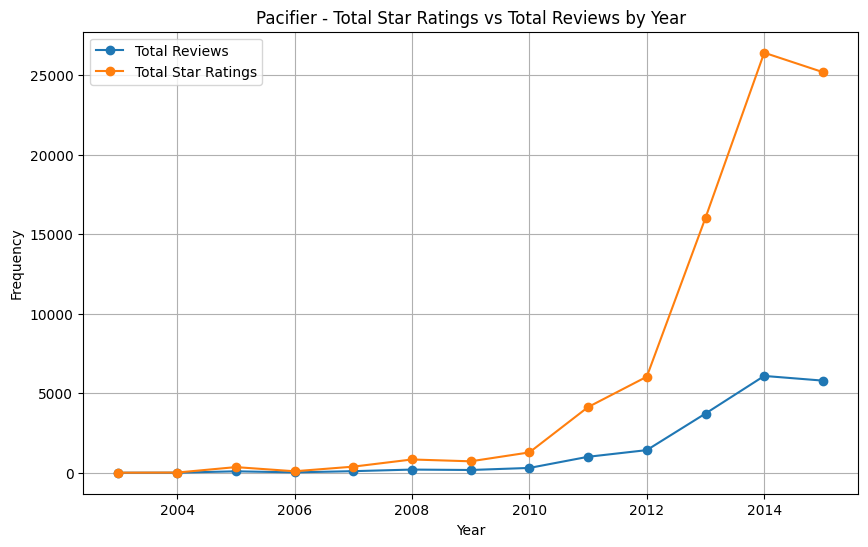

In [61]:
# Group by year and count occurrences of star ratings and reviews
grouped_pf_data_year = pacifier_df.groupby('review_year').size().reset_index(name='Total_Reviews')
grouped_pf_ratings_year = pacifier_df.groupby('review_year')['star_rating'].sum().reset_index(name='Total_star_ratings')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(grouped_pf_data_year['review_year'], grouped_pf_data_year['Total_Reviews'], label='Total Reviews', marker='o')
plt.plot(grouped_pf_ratings_year['review_year'], grouped_pf_ratings_year['Total_star_ratings'], label='Total Star Ratings', marker='o')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Pacifier - Total Star Ratings vs Total Reviews by Year')
plt.legend()
plt.grid(True)

plt.show()

In [62]:
# Get the correlation between Total Reviews and Total Start Ratings (Grouped by Year)
correlation = grouped_pf_data_year['Total_Reviews'].corr(grouped_pf_ratings_year['Total_star_ratings'])

print("Correlation between Total Star Ratings and Total Reviews:", correlation)

Correlation between Total Star Ratings and Total Reviews: 0.9999725916388981


#### Low Ratings Vs High Ratings and How they affect Number of Reviews

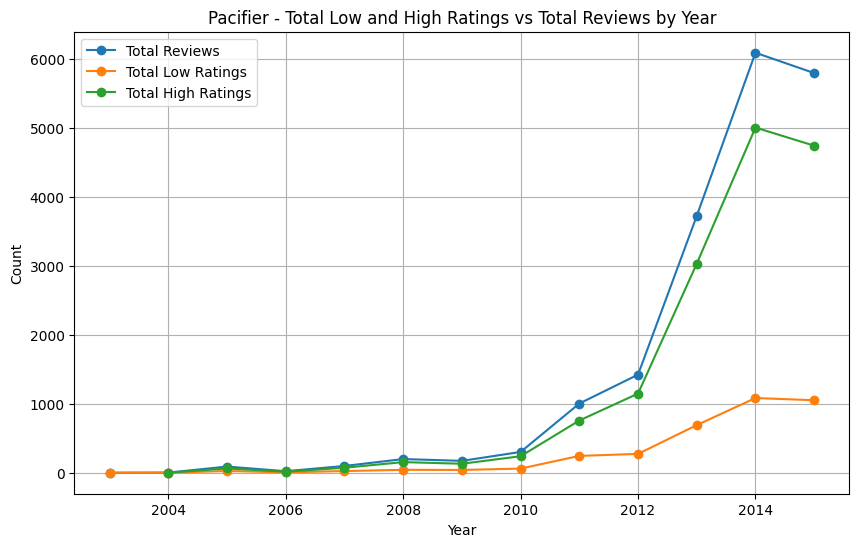

Correlation between Total Low Ratings and Total Reviews: 0.9990126583282548
Correlation between Total High Ratings and Total Reviews: 0.9254278043093739


In [63]:
low_rating_threshold = 3
high_rating_threshold = 4

# Filter data for low and high ratings
low_ratings_pf_year = pacifier_df[pacifier_df['star_rating'] <= low_rating_threshold]
high_ratings_pf_year = pacifier_df[pacifier_df['star_rating'] >= high_rating_threshold]

# Group low ratings and high by year and calculate total reviews
grouped_low_pf_ratings = low_ratings_pf_year.groupby('review_year').size().reset_index(name='Total_Low_Ratings')
grouped_high_pf_ratings = high_ratings_pf_year.groupby('review_year').size().reset_index(name='Total_High_Ratings')

plt.figure(figsize=(10, 6))
plt.plot(grouped_pf_data_year['review_year'], grouped_pf_data_year['Total_Reviews'], label='Total Reviews', marker='o')
plt.plot(grouped_low_pf_ratings['review_year'], grouped_low_pf_ratings['Total_Low_Ratings'], label='Total Low Ratings', marker='o')
plt.plot(grouped_high_pf_ratings['review_year'], grouped_high_pf_ratings['Total_High_Ratings'], label='Total High Ratings', marker='o')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Pacifier - Total Low and High Ratings vs Total Reviews by Year')
plt.legend()
plt.grid(True)

plt.show()

# Calculate the correlation between total low ratings, total high rating and total reviews
correlation_low = grouped_low_pf_ratings['Total_Low_Ratings'].corr(grouped_pf_data_year['Total_Reviews'])
correlation_high = grouped_high_pf_ratings['Total_High_Ratings'].corr(grouped_pf_data_year['Total_Reviews'])

print("Correlation between Total Low Ratings and Total Reviews:", correlation_low)
print("Correlation between Total High Ratings and Total Reviews:", correlation_high)

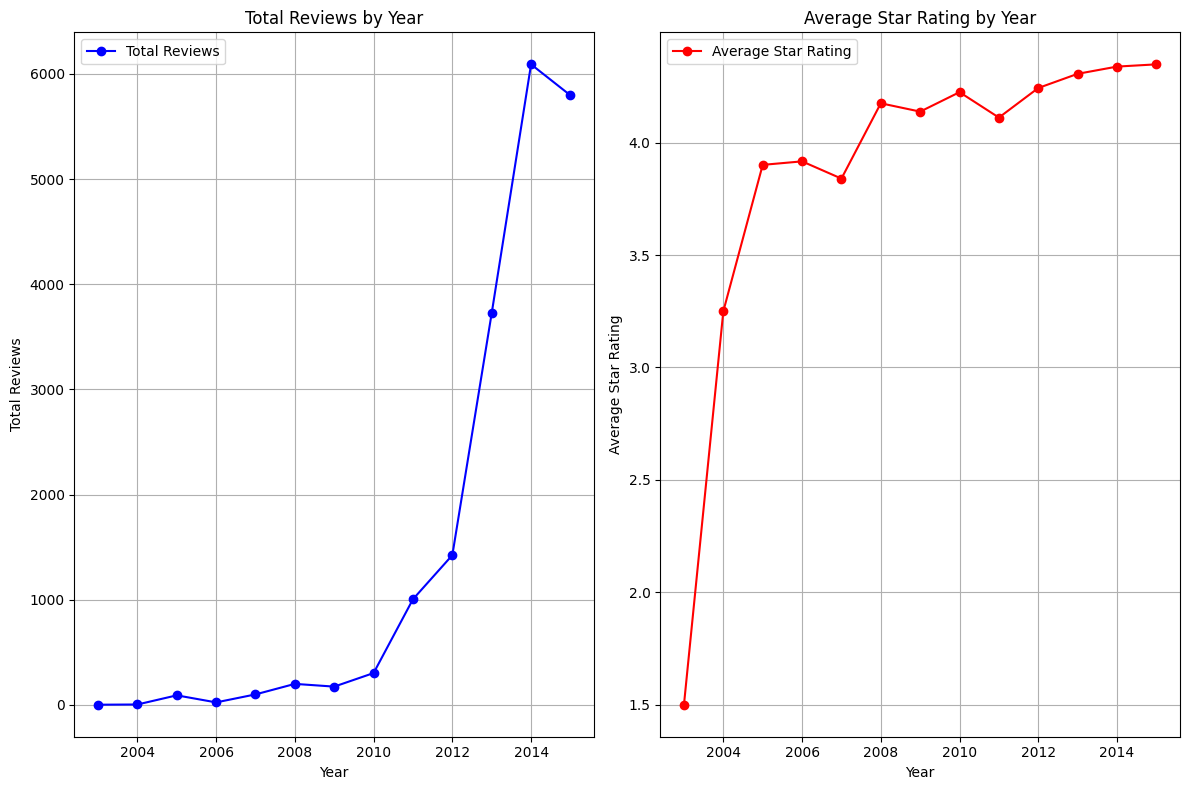

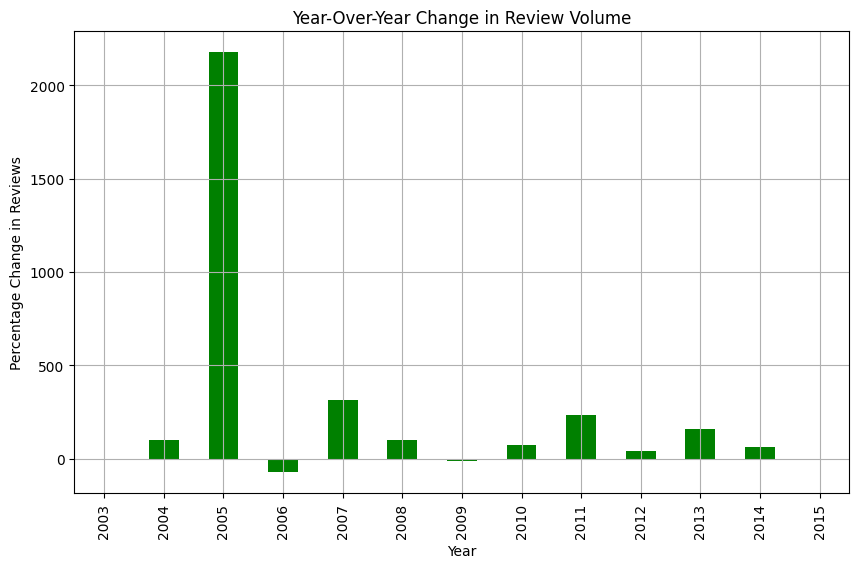

In [64]:
# Group data by year and calculate total reviews and average star rating
grouped_pf_data_year = pacifier_df.groupby('review_year').agg({
    'review_id': 'size',
    'star_rating': 'mean'
}).rename(columns={'review_id': 'Total_Reviews', 'star_rating': 'Average_Star_Rating'})

grouped_pf_data_year['Review_Change'] = grouped_pf_data_year['Total_Reviews'].pct_change() * 100

# Plotting the results
plt.figure(figsize=(12, 8))

# Total reviews by year
ax1 = plt.subplot(1, 2, 1)
grouped_pf_data_year['Total_Reviews'].plot(ax=ax1, label='Total Reviews', marker='o', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Reviews')
ax1.set_title('Total Reviews by Year')
ax1.legend()
ax1.grid(True)

# Average star rating by year
ax2 = plt.subplot(1, 2, 2)
grouped_pf_data_year['Average_Star_Rating'].plot(ax=ax2, label='Average Star Rating', marker='o', color='red')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Star Rating')
ax2.set_title('Average Star Rating by Year')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# percentage change in review volume
plt.figure(figsize=(10, 6))
grouped_pf_data_year['Review_Change'].plot(kind='bar', color='green')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Reviews')
plt.title('Year-Over-Year Change in Review Volume')
plt.grid(True)
plt.show()

### Start Ratings Vs Number of Reviews (Grouped by Month)

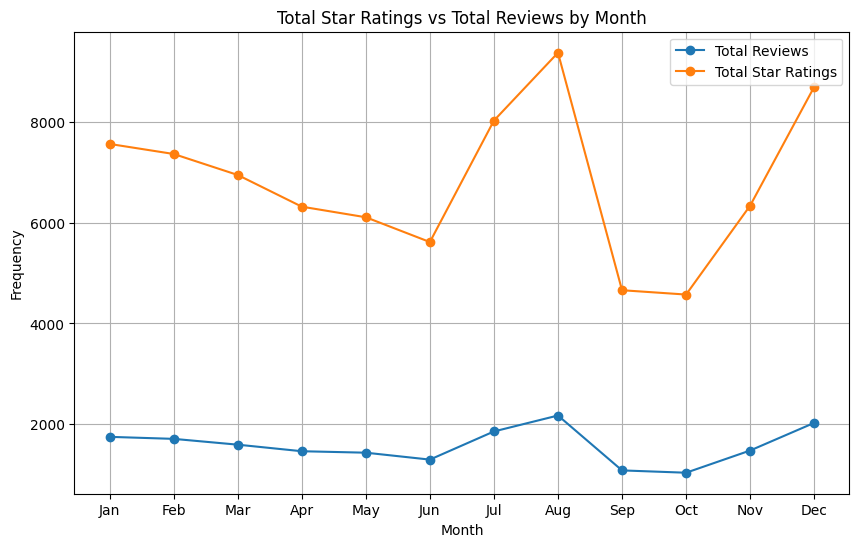

In [65]:
# Group by month and count occurrences of star ratings and reviews
grouped_pf_data_month = pacifier_df.groupby('review_month').size().reset_index(name='Total_Reviews')
grouped_pf_ratings_month = pacifier_df.groupby('review_month')['star_rating'].sum().reset_index(name='Total_star_ratings')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(grouped_pf_data_month['review_month'], grouped_pf_data_month['Total_Reviews'], label='Total Reviews', marker='o')
plt.plot(grouped_pf_ratings_month['review_month'], grouped_pf_ratings_month['Total_star_ratings'], label='Total Star Ratings', marker='o')

plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.title('Total Star Ratings vs Total Reviews by Month')
plt.legend()
plt.grid(True)

plt.show()

In [66]:
# Get the correlation between Total Reviews and Total Start Ratings (Grouped by Month)
correlation = grouped_pf_data_month['Total_Reviews'].corr(grouped_pf_ratings_month['Total_star_ratings'])

print("Correlation between Total Star Ratings and Total Reviews:", correlation)

Correlation between Total Star Ratings and Total Reviews: 0.9995018831843026


#### Low Ratings Vs High Ratings and How they affect Number of Reviews

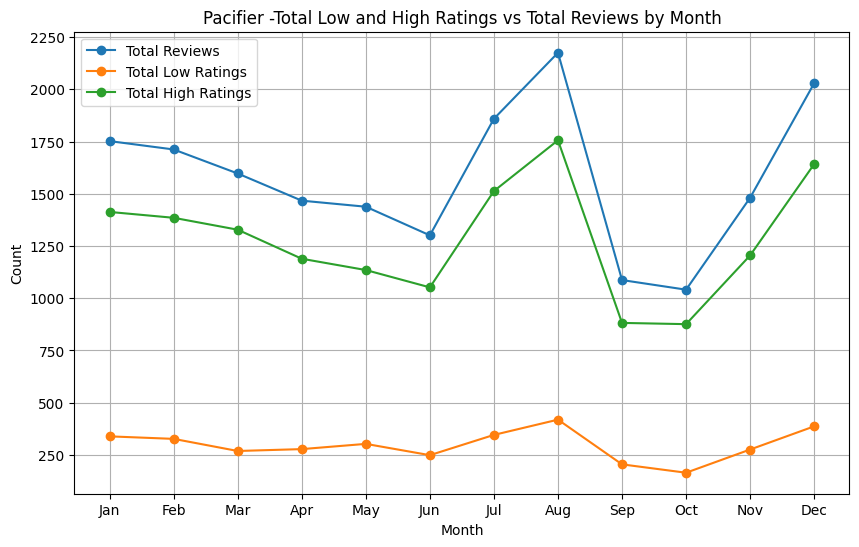

Correlation between Total Low Ratings and Total Reviews: 0.97383102319086
Correlation between Total High Ratings and Total Reviews: 0.9982433134487364


In [67]:
low_rating_threshold = 3
high_rating_threshold = 4

# Filter data for low and high ratings
low_ratings_pf_month = pacifier_df[pacifier_df['star_rating'] <= low_rating_threshold]
high_ratings_pf_month = pacifier_df[pacifier_df['star_rating'] >= high_rating_threshold]

# Group low ratings and high by month and calculate total reviews
grouped_low_pf_ratings_month = low_ratings_pf_month.groupby('review_month').size().reset_index(name='Total_Low_Ratings')
grouped_high_pf_ratings_month = high_ratings_pf_month.groupby('review_month').size().reset_index(name='Total_High_Ratings')

plt.figure(figsize=(10, 6))
plt.plot(grouped_pf_data_month['review_month'], grouped_pf_data_month['Total_Reviews'], label='Total Reviews', marker='o')
plt.plot(grouped_low_pf_ratings_month['review_month'], grouped_low_pf_ratings_month['Total_Low_Ratings'], label='Total Low Ratings', marker='o')
plt.plot(grouped_high_pf_ratings_month['review_month'], grouped_high_pf_ratings_month['Total_High_Ratings'], label='Total High Ratings', marker='o')

plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.title('Pacifier -Total Low and High Ratings vs Total Reviews by Month')
plt.legend()
plt.grid(True)

plt.show()

# Calculate the correlation between total low ratings, total high rating and total reviews
correlation_low = grouped_low_pf_ratings_month['Total_Low_Ratings'].corr(grouped_pf_data_month['Total_Reviews'])
correlation_high = grouped_high_pf_ratings_month['Total_High_Ratings'].corr(grouped_pf_data_month['Total_Reviews'])

print("Correlation between Total Low Ratings and Total Reviews:", correlation_low)
print("Correlation between Total High Ratings and Total Reviews:", correlation_high)

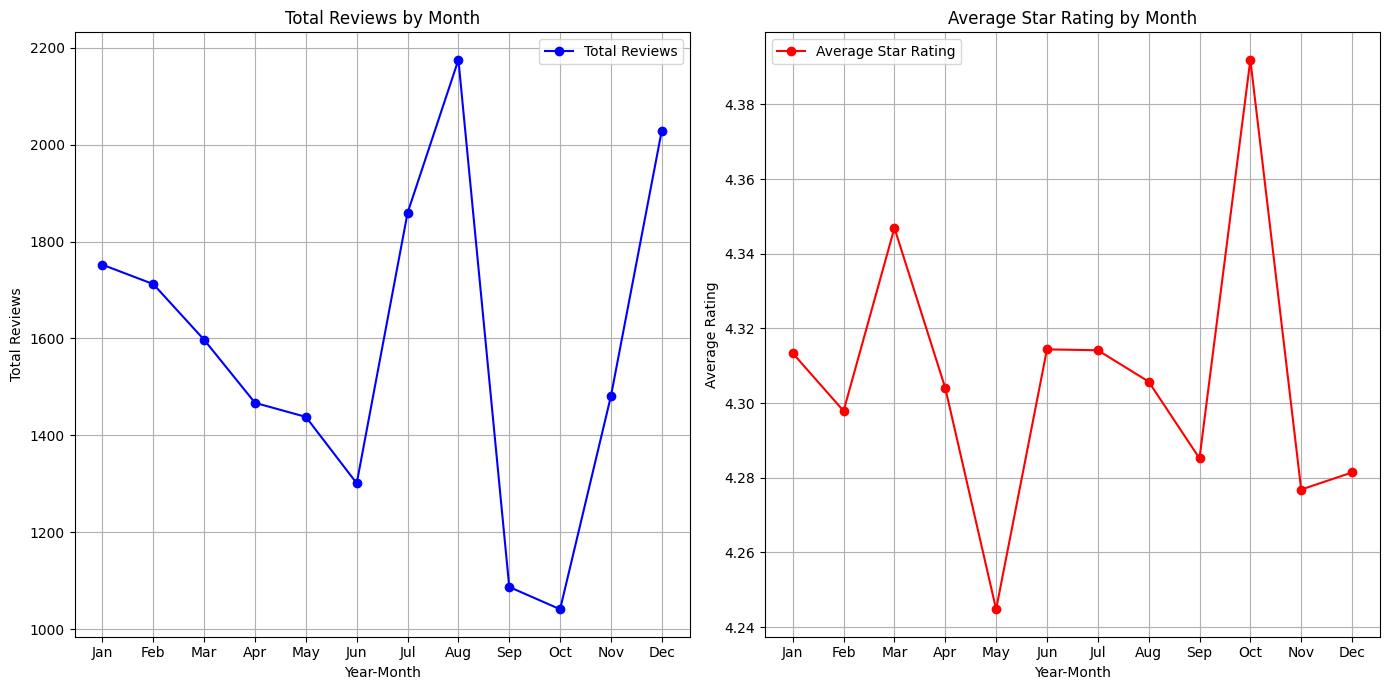

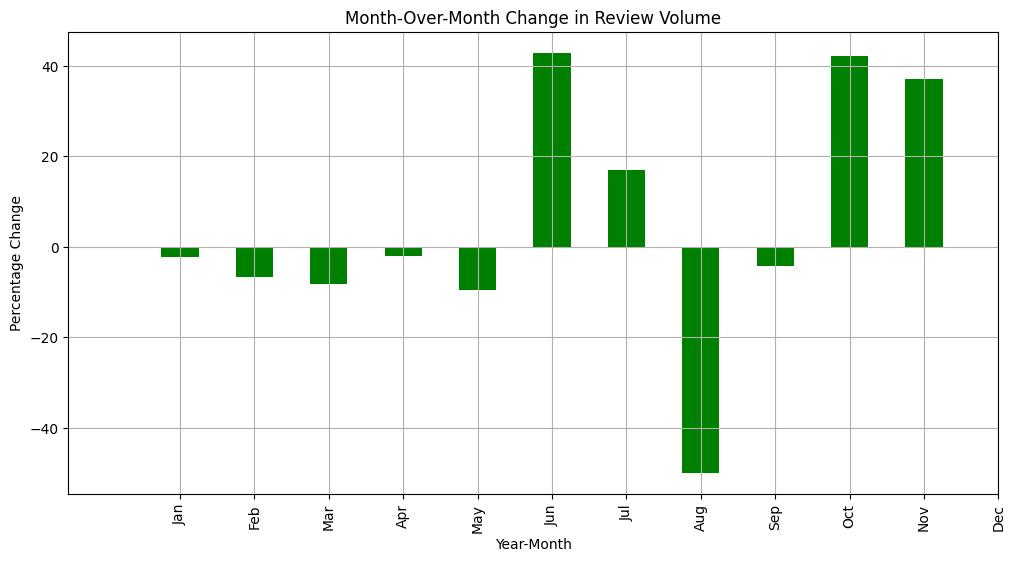

In [69]:
# Aggregate data to calculate total reviews and average star rating per month
grouped_pf_data_month = pacifier_df.groupby('review_month').agg({
    'review_id': 'size',
    'star_rating': 'mean' 
}).rename(columns={'review_id': 'Total_Reviews', 'star_rating': 'Average_Star_Rating'})

grouped_pf_data_month['Review_Change'] = grouped_pf_data_month['Total_Reviews'].pct_change() * 100

plt.figure(figsize=(14, 7))

# Total reviews by month
plt.subplot(1, 2, 1)
grouped_pf_data_month['Total_Reviews'].plot(marker='o', color='blue', label='Total Reviews')
plt.title('Total Reviews by Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Reviews')
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.legend()
plt.grid(True)

# Average star rating by month
plt.subplot(1, 2, 2)
grouped_pf_data_month['Average_Star_Rating'].plot(marker='o', color='red', label='Average Star Rating')
plt.title('Average Star Rating by Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# plot the percentage change in review volume
plt.figure(figsize=(12, 6))
grouped_pf_data_month['Review_Change'].plot(kind='bar', color='green')
plt.title('Month-Over-Month Change in Review Volume')
plt.xlabel('Year-Month')
plt.ylabel('Percentage Change')
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.grid(True)
plt.show()

### How does Low Rating and High Rating streaks affect next Rating Type

In [71]:
pacifier_df.sort_values('review_date', inplace=True)

pacifier_df['rating_type'] = pd.cut(pacifier_df['star_rating'], bins=[0, 2, 3.9, 5], labels=['low', 'neutral', 'high'])

def detect_streaks(series, window_size, label):
    streaks = [False] * len(series)
    for i in range(len(series) - window_size + 1):
        window = series.iloc[i:i+window_size]
        if all(window == label):
            streaks[i + window_size - 1] = True
    return pd.Series(streaks, index=series.index)

window_size = 3 
pacifier_df['low_streak'] = detect_streaks(pacifier_df['rating_type'], window_size, 'low')
pacifier_df['high_streak'] = detect_streaks(pacifier_df['rating_type'], window_size, 'high')

pacifier_df['next_rating_type'] = pacifier_df['rating_type'].shift(-1)

summary_df = pacifier_df.groupby(['low_streak', 'high_streak', 'next_rating_type']).size().unstack(fill_value=0)

print(summary_df)

next_rating_type         low  neutral  high
low_streak high_streak                     
False      False        1020      671  7031
           True         1112      753  8317
True       False           4        2    28
           True            0        0     0


In [72]:
# streak detection and subsequent ratings as before
pacifier_df['low_streak'] = detect_streaks(pacifier_df['rating_type'], window_size, 'low')
pacifier_df['high_streak'] = detect_streaks(pacifier_df['rating_type'], window_size, 'high')
pacifier_df['next_rating_type'] = pacifier_df['rating_type'].shift(-1)

grouped_by_time = pacifier_df.groupby(['review_year', 'review_month', 'low_streak', 'high_streak', 'next_rating_type']).size().unstack(fill_value=0)
print(grouped_by_time)

next_rating_type                                 low  neutral  high
review_year review_month low_streak high_streak                    
2003        1            False      False          0        0     0
                                    True           0        0     0
                         True       False          0        0     0
                                    True           0        0     0
            2            False      False          0        0     0
...                                              ...      ...   ...
2015        11           True       True           0        0     0
            12           False      False          0        0     0
                                    True           0        0     0
                         True       False          0        0     0
                                    True           0        0     0

[624 rows x 3 columns]


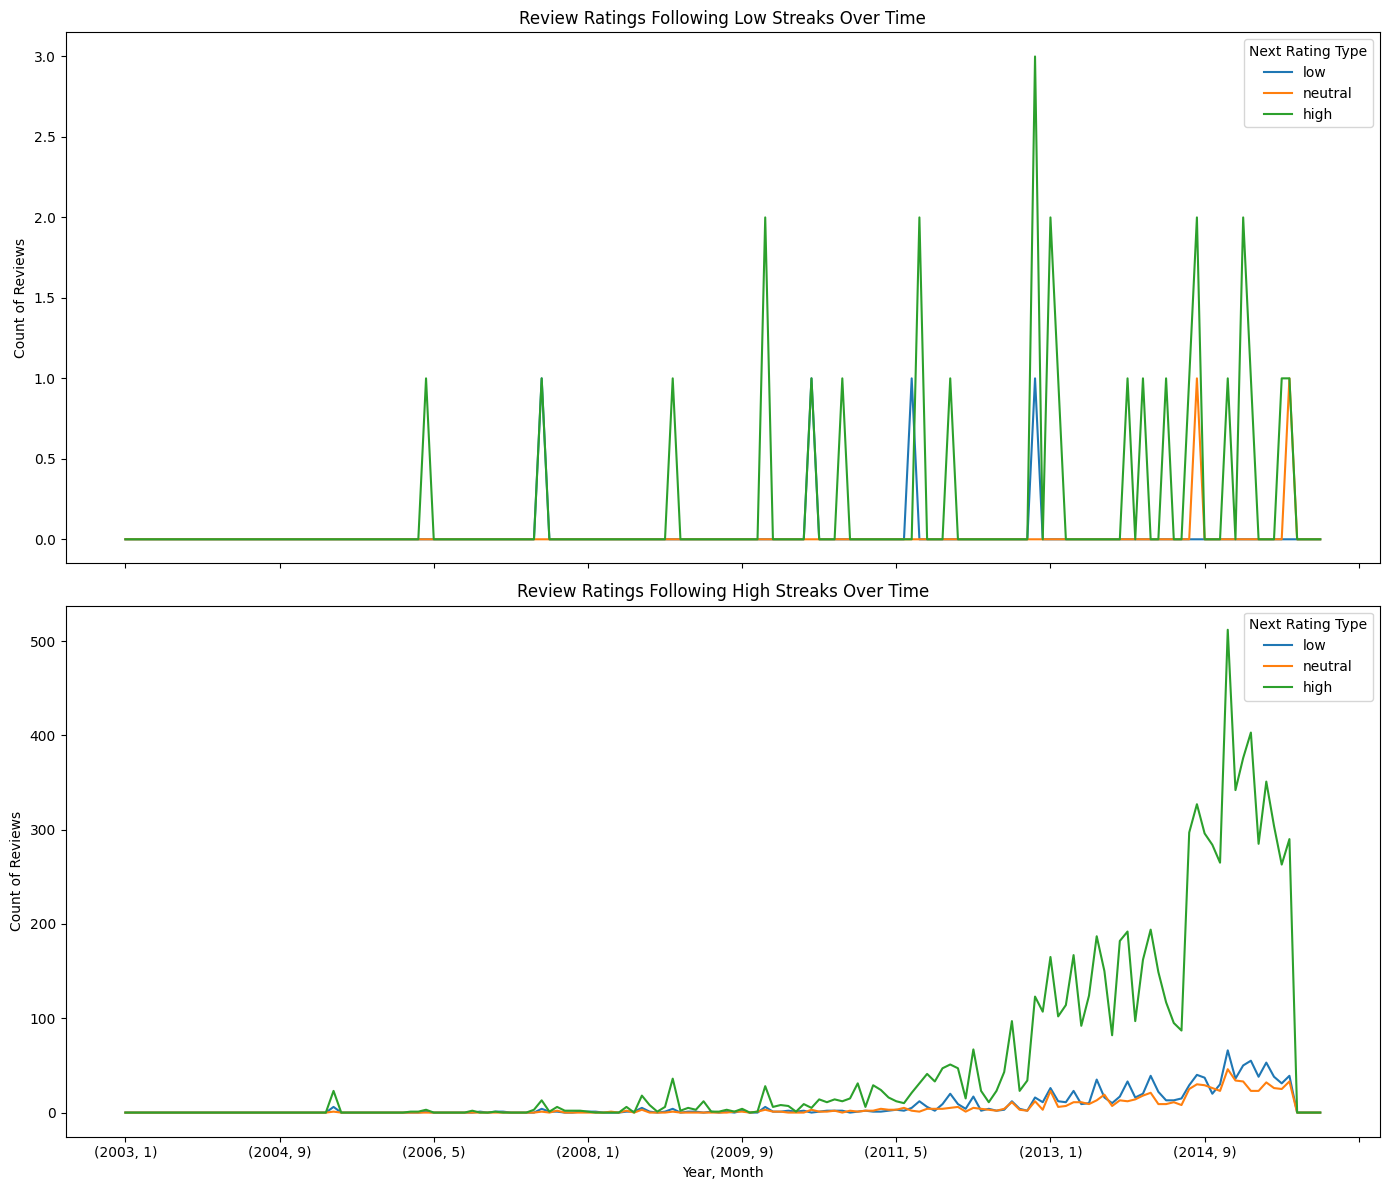

In [73]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), sharex=True)

# Plot total counts of reviews following low streaks
grouped_by_time.xs((True, False), level=('low_streak', 'high_streak'))[['low', 'neutral', 'high']].plot(
    ax=axs[0], title='Review Ratings Following Low Streaks Over Time'
)
axs[0].set_ylabel('Count of Reviews')
axs[0].legend(title='Next Rating Type')

# Plot total counts of reviews following high streaks
grouped_by_time.xs((False, True), level=('low_streak', 'high_streak'))[['low', 'neutral', 'high']].plot(
    ax=axs[1], title='Review Ratings Following High Streaks Over Time'
)
axs[1].set_xlabel('Year, Month')
axs[1].set_ylabel('Count of Reviews')
axs[1].legend(title='Next Rating Type')

plt.tight_layout()
plt.show()

## Microwave 

In [86]:
microwave_df = pd.read_csv('Problem_C_Data/microwave.tsv', sep='\t')
microwave_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,21879631,RY52KZABZK8QF,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,1,0,0,N,Y,Do not recommend it. go use your money for som...,3 of the buttons stopped working after a month...,8/31/2015
1,US,14964566,R3GCOEV4HYZG2I,B0055UBB4O,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,5,0,0,N,Y,Looks as good as the picture,Didn't use it long so I can't attest to that b...,8/31/2015
2,US,13230389,R1V2OPPNL0QGCE,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,4,0,0,N,Y,Four Stars,"Very nice microwave, great price",8/31/2015
3,US,43655888,R9Q0QDTLKV567,B004ZU09QQ,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,3,0,1,N,Y,quiet,"Quiet, but does not seem like 1000 watt power.",8/31/2015
4,US,117794,R3DL7HYC3QTWNI,B005GSZB7I,827502283,"whirlpool stainless look countertop microwave,...",Major Appliances,4,0,0,N,Y,Four Stars,It's bigger than I thought.,8/31/2015


In [87]:
# 1615 sample data points with 15 unqiue features
microwave_df.shape

(1615, 15)

In [88]:
# Describe the data
microwave_df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,1.615000e+03,1.615000e+03,1615.000000,1615.000000,1615.000000
mean,2.956669e+07,5.327655e+08,3.444582,5.621672,6.669350
std,1.551920e+07,2.312119e+08,1.645238,27.771593,29.262638
min,2.838300e+04,1.092264e+08,1.000000,0.000000,0.000000
25%,1.544962e+07,4.234219e+08,2.000000,0.000000,0.000000
50%,2.987940e+07,4.863812e+08,4.000000,1.000000,2.000000
75%,4.408202e+07,7.310253e+08,5.000000,3.000000,5.000000
max,5.309410e+07,9.943392e+08,5.000000,814.000000,848.000000


In [89]:
# Print the unique values in all columns
for column in microwave_df.columns:
    print(f"Column: {column}, unique values {microwave_df[column].unique() if len(microwave_df[column].unique()) < 10 else 'MORE THAN 10 VALUES'}")

Column: marketplace, unique values ['US' 'us']
Column: customer_id, unique values MORE THAN 10 VALUES
Column: review_id, unique values MORE THAN 10 VALUES
Column: product_id, unique values MORE THAN 10 VALUES
Column: product_parent, unique values MORE THAN 10 VALUES
Column: product_title, unique values MORE THAN 10 VALUES
Column: product_category, unique values ['Major Appliances' 'major appliances']
Column: star_rating, unique values [1 5 4 3 2]
Column: helpful_votes, unique values MORE THAN 10 VALUES
Column: total_votes, unique values MORE THAN 10 VALUES
Column: vine, unique values ['N' 'n' 'Y']
Column: verified_purchase, unique values ['Y' 'N' 'y' 'n']
Column: review_headline, unique values MORE THAN 10 VALUES
Column: review_body, unique values MORE THAN 10 VALUES
Column: review_date, unique values MORE THAN 10 VALUES


### Verify Total Reviews = Review Headline = Review Body

In [90]:
# Verify review headline and body don't contain any NA values

# Check if any values in 'review_body' are empty
review_body_empty = microwave_df['review_headline'].isna().any()

# Check if any values in 'headline' are empty
headline_empty = microwave_df['review_body'].isna().any()

# Count the number of empty values in 'review_body' and 'headline'
review_body_empty_count = microwave_df['review_body'].isna().sum()
headline_empty_count = microwave_df['review_headline'].isna().sum()

print("Headline has empty values:", headline_empty)
print("Number of empty values in Headline:", headline_empty_count)

print("Review Body has empty values:", review_body_empty)
print("Number of empty values in Review Body:", review_body_empty_count)

Headline has empty values: False
Number of empty values in Headline: 0
Review Body has empty values: False
Number of empty values in Review Body: 0


In [91]:
# Convert review_date to datetime object
microwave_df['review_date'] = pd.to_datetime(microwave_df['review_date'])

# Add the year and month column (hd = hair dryer) [Year (2002 - 2015) ]
microwave_df['review_year'] = microwave_df['review_date'].dt.year
microwave_df['review_month'] = microwave_df['review_date'].dt.month

microwave_df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_year,review_month
0,US,21879631,RY52KZABZK8QF,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,1,0,0,N,Y,Do not recommend it. go use your money for som...,3 of the buttons stopped working after a month...,2015-08-31,2015,8
1,US,14964566,R3GCOEV4HYZG2I,B0055UBB4O,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,5,0,0,N,Y,Looks as good as the picture,Didn't use it long so I can't attest to that b...,2015-08-31,2015,8
2,US,13230389,R1V2OPPNL0QGCE,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,4,0,0,N,Y,Four Stars,"Very nice microwave, great price",2015-08-31,2015,8
3,US,43655888,R9Q0QDTLKV567,B004ZU09QQ,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,3,0,1,N,Y,quiet,"Quiet, but does not seem like 1000 watt power.",2015-08-31,2015,8
4,US,117794,R3DL7HYC3QTWNI,B005GSZB7I,827502283,"whirlpool stainless look countertop microwave,...",Major Appliances,4,0,0,N,Y,Four Stars,It's bigger than I thought.,2015-08-31,2015,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,US,49010899,R2OXHMMI830KJ3,B00009V3X6,459626087,sharp 1.1-cubic-foot 850-watt over-the-range c...,Major Appliances,2,12,14,N,N,"A great, sleek oven... if you can get an undam...",We ordered one of these and were shipped an op...,2004-09-13,2004,9
1611,US,40308862,RY9INWIK8MAL3,B00012ORT2,305608994,sharp 950-watt 1-2/5-cubic-foot over-the-range...,Major Appliances,3,20,53,N,N,What Happened to Sharp Quality?,I do not have this particular microwave; thoug...,2004-07-20,2004,7
1612,US,36386173,RXOAWGI9Z98QY,B00009V3WZ,379992322,sharp 1-1/2-cubic-foot 1000-watt over-the-rang...,Major Appliances,4,19,19,N,Y,"Great microwave, little tough to mount",Its a pretty big and heavy unit so having some...,2004-06-25,2004,6
1613,US,18471248,RVNWLGVDWE20J,B00009V3X8,379992322,sharp 1-1/2-cubic-foot 1000-watt over-the-rang...,Major Appliances,3,6,6,N,Y,Sharp could be Sharper,UPDATE: Yes i too had the door latch button me...,2004-06-21,2004,6


### Star Ratings Vs Number of Reviews (Grouped by Year)

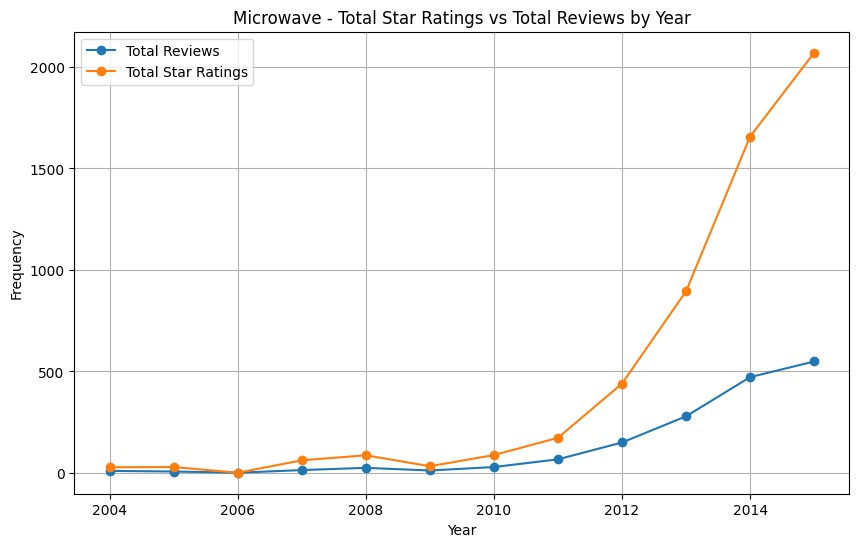

In [92]:
# Group by year and count occurrences of star ratings and reviews
grouped_mv_data_year = microwave_df.groupby('review_year').size().reset_index(name='Total_Reviews')
grouped_mv_ratings_year = microwave_df.groupby('review_year')['star_rating'].sum().reset_index(name='Total_star_ratings')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(grouped_mv_data_year['review_year'], grouped_mv_data_year['Total_Reviews'], label='Total Reviews', marker='o')
plt.plot(grouped_mv_ratings_year['review_year'], grouped_mv_ratings_year['Total_star_ratings'], label='Total Star Ratings', marker='o')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Microwave - Total Star Ratings vs Total Reviews by Year')
plt.legend()
plt.grid(True)

plt.show()

In [93]:
# Get the correlation between Total Reviews and Total Start Ratings (Grouped by Year)
correlation = grouped_mv_data_year['Total_Reviews'].corr(grouped_mv_ratings_year['Total_star_ratings'])

print("Correlation between Total Star Ratings and Total Reviews:", correlation)

Correlation between Total Star Ratings and Total Reviews: 0.9970857784668128


#### Low Ratings Vs High Ratings and How they affect Number of Reviews

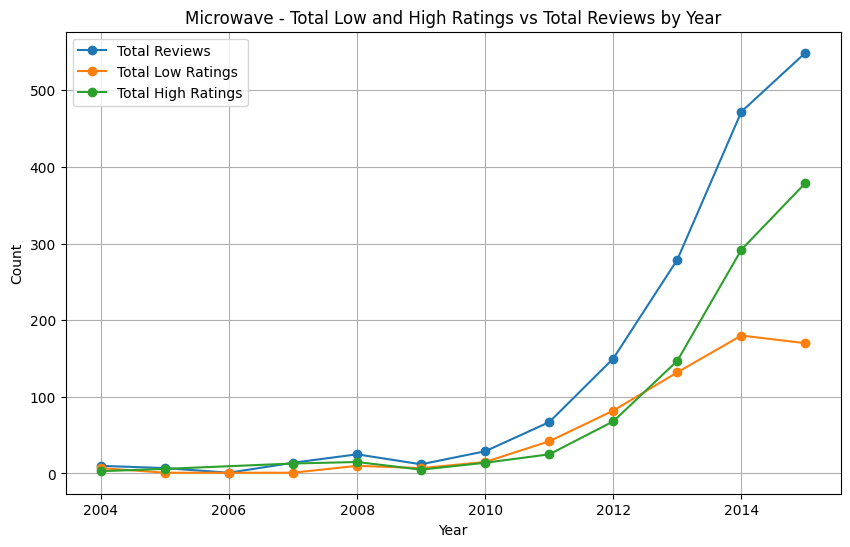

Correlation between Total Low Ratings and Total Reviews: 0.9750493526056779
Correlation between Total High Ratings and Total Reviews: 0.9879373035160378


In [94]:
low_rating_threshold = 3
high_rating_threshold = 4

# Filter data for low and high ratings
low_ratings_mv_year = microwave_df[microwave_df['star_rating'] <= low_rating_threshold]
high_ratings_mv_year = microwave_df[microwave_df['star_rating'] >= high_rating_threshold]

# Group low ratings and high by year and calculate total reviews
grouped_low_mv_ratings = low_ratings_mv_year.groupby('review_year').size().reset_index(name='Total_Low_Ratings')
grouped_high_mv_ratings = high_ratings_mv_year.groupby('review_year').size().reset_index(name='Total_High_Ratings')

plt.figure(figsize=(10, 6))
plt.plot(grouped_mv_data_year['review_year'], grouped_mv_data_year['Total_Reviews'], label='Total Reviews', marker='o')
plt.plot(grouped_low_mv_ratings['review_year'], grouped_low_mv_ratings['Total_Low_Ratings'], label='Total Low Ratings', marker='o')
plt.plot(grouped_high_mv_ratings['review_year'], grouped_high_mv_ratings['Total_High_Ratings'], label='Total High Ratings', marker='o')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Microwave - Total Low and High Ratings vs Total Reviews by Year')
plt.legend()
plt.grid(True)

plt.show()

# Calculate the correlation between total low ratings, total high rating and total reviews
correlation_low = grouped_low_mv_ratings['Total_Low_Ratings'].corr(grouped_mv_data_year['Total_Reviews'])
correlation_high = grouped_high_mv_ratings['Total_High_Ratings'].corr(grouped_mv_data_year['Total_Reviews'])

print("Correlation between Total Low Ratings and Total Reviews:", correlation_low)
print("Correlation between Total High Ratings and Total Reviews:", correlation_high)

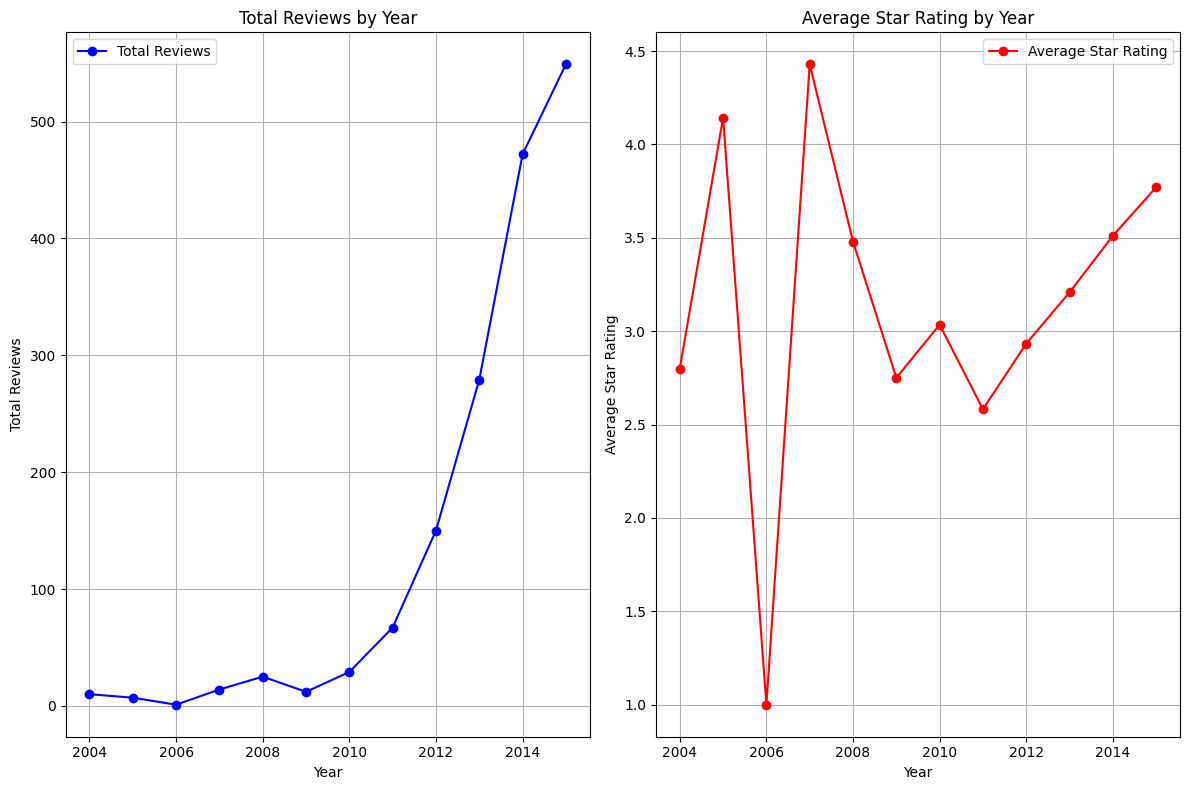

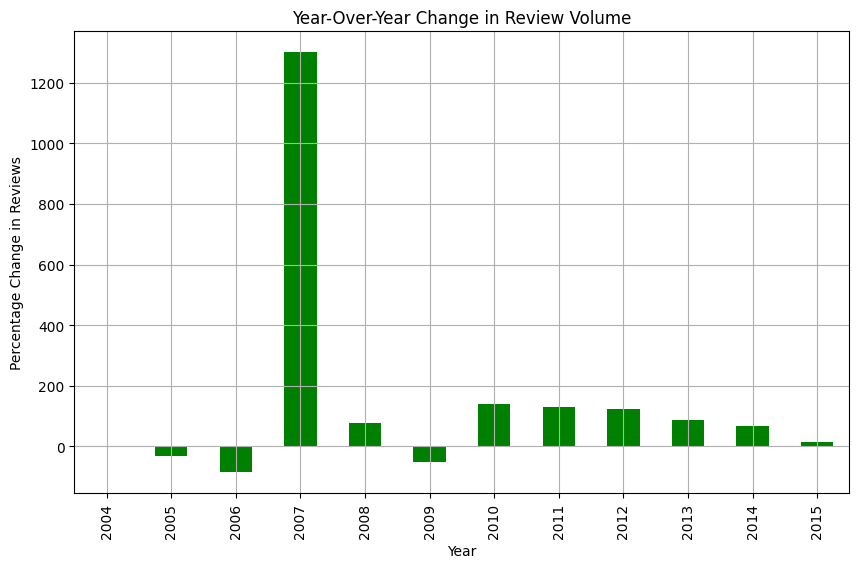

In [95]:
# Group data by year and calculate total reviews and average star rating
grouped_mv_data_year = microwave_df.groupby('review_year').agg({
    'review_id': 'size',
    'star_rating': 'mean'
}).rename(columns={'review_id': 'Total_Reviews', 'star_rating': 'Average_Star_Rating'})

grouped_mv_data_year['Review_Change'] = grouped_mv_data_year['Total_Reviews'].pct_change() * 100

# Plotting the results
plt.figure(figsize=(12, 8))

# Total reviews by year
ax1 = plt.subplot(1, 2, 1)
grouped_mv_data_year['Total_Reviews'].plot(ax=ax1, label='Total Reviews', marker='o', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Reviews')
ax1.set_title('Total Reviews by Year')
ax1.legend()
ax1.grid(True)

# Average star rating by year
ax2 = plt.subplot(1, 2, 2)
grouped_mv_data_year['Average_Star_Rating'].plot(ax=ax2, label='Average Star Rating', marker='o', color='red')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Star Rating')
ax2.set_title('Average Star Rating by Year')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# percentage change in review volume
plt.figure(figsize=(10, 6))
grouped_mv_data_year['Review_Change'].plot(kind='bar', color='green')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Reviews')
plt.title('Year-Over-Year Change in Review Volume')
plt.grid(True)
plt.show()

### Start Ratings Vs Number of Reviews (Grouped by Month)

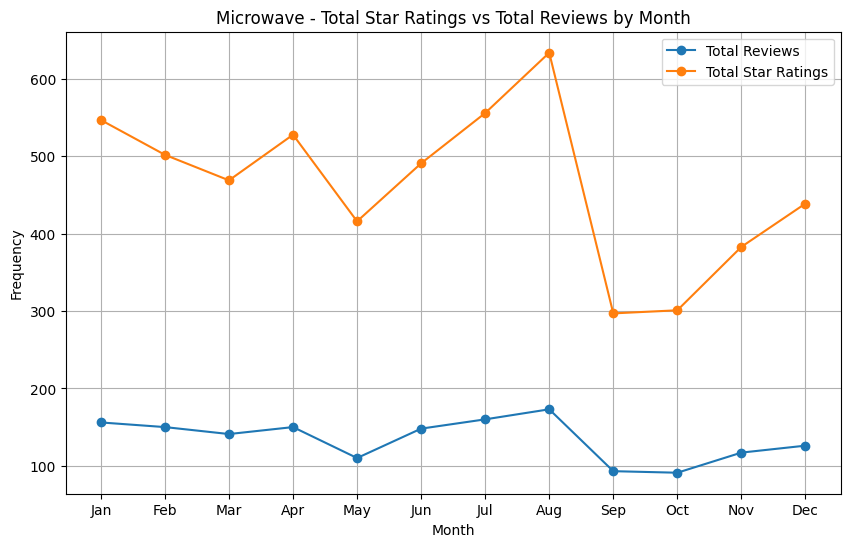

In [83]:
# Group by month and count occurrences of star ratings and reviews
grouped_mv_data_month = microwave_df.groupby('review_month').size().reset_index(name='Total_Reviews')
grouped_mv_ratings_month = microwave_df.groupby('review_month')['star_rating'].sum().reset_index(name='Total_star_ratings')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(grouped_mv_data_month['review_month'], grouped_mv_data_month['Total_Reviews'], label='Total Reviews', marker='o')
plt.plot(grouped_mv_ratings_month['review_month'], grouped_mv_ratings_month['Total_star_ratings'], label='Total Star Ratings', marker='o')

plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.title('Microwave - Total Star Ratings vs Total Reviews by Month')
plt.legend()
plt.grid(True)

plt.show()

In [84]:
# Get the correlation between Total Reviews and Total Start Ratings (Grouped by Month)
correlation = grouped_mv_data_month['Total_Reviews'].corr(grouped_mv_ratings_month['Total_star_ratings'])

print("Correlation between Total Star Ratings and Total Reviews:", correlation)

Correlation between Total Star Ratings and Total Reviews: 0.980692637519554


#### Low Ratings Vs High Ratings and How they affect Number of Reviews

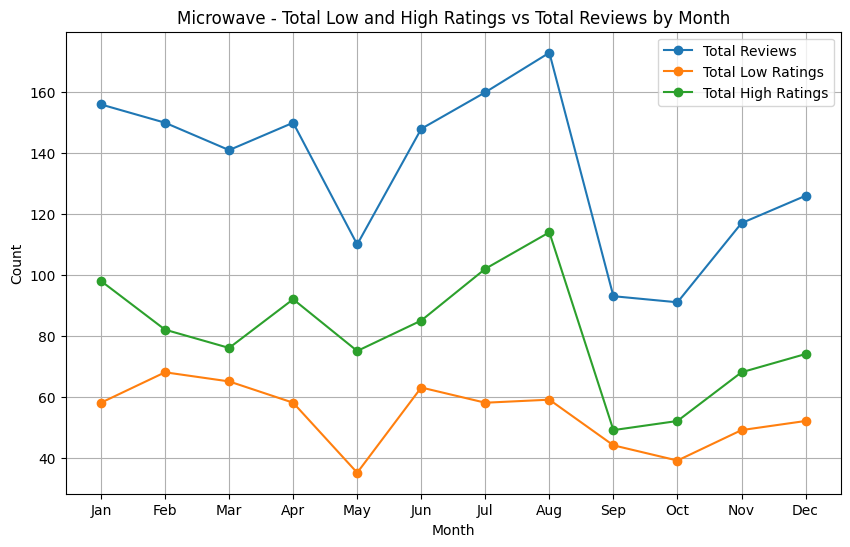

Correlation between Total Low Ratings and Total Reviews: 0.8138385239310812
Correlation between Total High Ratings and Total Reviews: 0.9498936094038416


In [137]:
low_rating_threshold = 3
high_rating_threshold = 4

# Filter data for low and high ratings
low_ratings_mv_month = microwave_df[microwave_df['star_rating'] <= low_rating_threshold]
high_ratings_mv_month = microwave_df[microwave_df['star_rating'] >= high_rating_threshold]

# Group low ratings and high by month and calculate total reviews
grouped_low_mv_ratings_month = low_ratings_mv_month.groupby('review_month').size().reset_index(name='Total_Low_Ratings')
grouped_high_mv_ratings_month = high_ratings_mv_month.groupby('review_month').size().reset_index(name='Total_High_Ratings')

plt.figure(figsize=(10, 6))
plt.plot(grouped_mv_data_month['review_month'], grouped_mv_data_month['Total_Reviews'], label='Total Reviews', marker='o')
plt.plot(grouped_low_mv_ratings_month['review_month'], grouped_low_mv_ratings_month['Total_Low_Ratings'], label='Total Low Ratings', marker='o')
plt.plot(grouped_high_mv_ratings_month['review_month'], grouped_high_mv_ratings_month['Total_High_Ratings'], label='Total High Ratings', marker='o')

plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.title('Microwave - Total Low and High Ratings vs Total Reviews by Month')
plt.legend()
plt.grid(True)

plt.show()

# Calculate the correlation between total low ratings, total high rating and total reviews
correlation_low = grouped_low_mv_ratings_month['Total_Low_Ratings'].corr(grouped_mv_data_month['Total_Reviews'])
correlation_high = grouped_high_mv_ratings_month['Total_High_Ratings'].corr(grouped_mv_data_month['Total_Reviews'])

print("Correlation between Total Low Ratings and Total Reviews:", correlation_low)
print("Correlation between Total High Ratings and Total Reviews:", correlation_high)

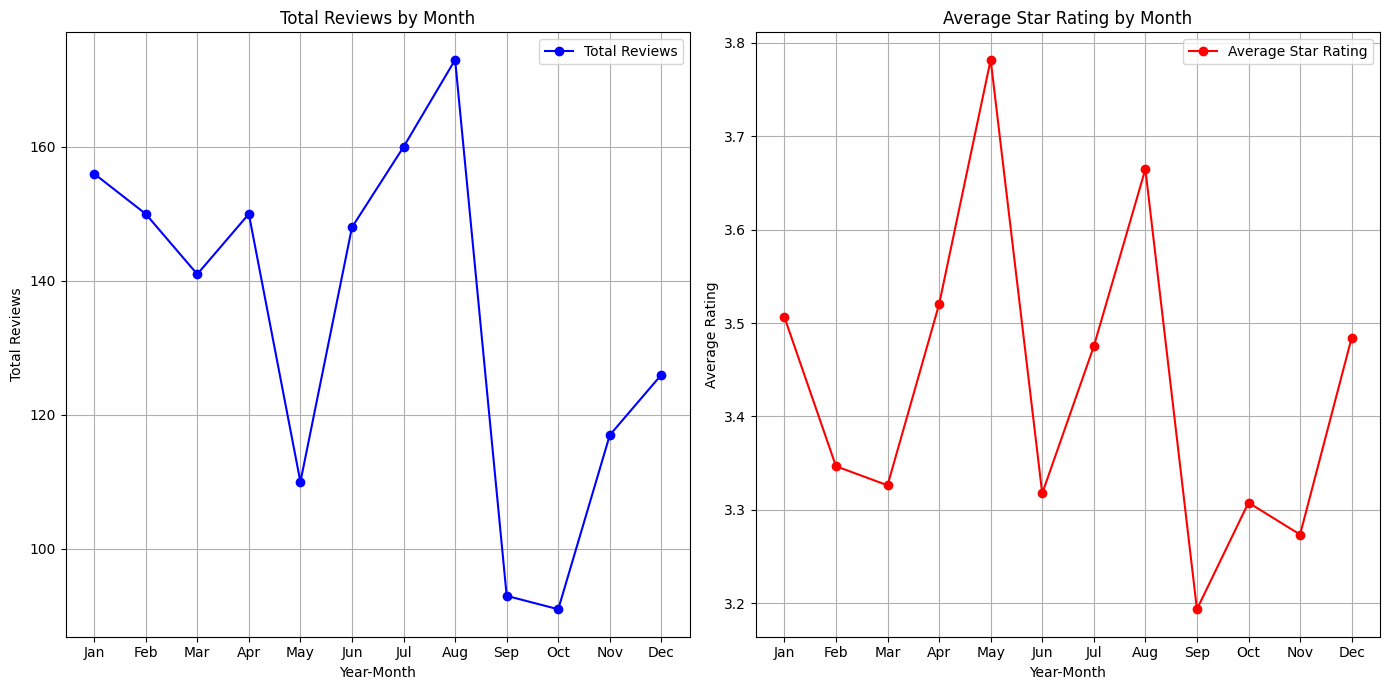

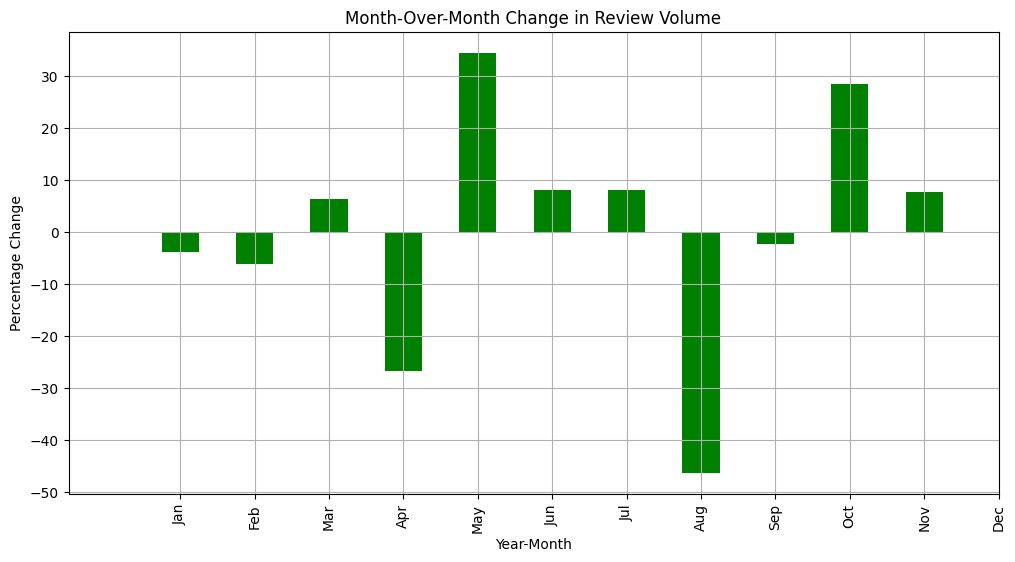

In [99]:
# Aggregate data to calculate total reviews and average star rating per month
grouped_mv_data_month = microwave_df.groupby('review_month').agg({
    'review_id': 'size',
    'star_rating': 'mean' 
}).rename(columns={'review_id': 'Total_Reviews', 'star_rating': 'Average_Star_Rating'})

grouped_mv_data_month['Review_Change'] = grouped_mv_data_month['Total_Reviews'].pct_change() * 100

plt.figure(figsize=(14, 7))

# Total reviews by month
plt.subplot(1, 2, 1)
grouped_mv_data_month['Total_Reviews'].plot(marker='o', color='blue', label='Total Reviews')
plt.title('Total Reviews by Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Reviews')
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.legend()
plt.grid(True)

# Average star rating by month
plt.subplot(1, 2, 2)
grouped_mv_data_month['Average_Star_Rating'].plot(marker='o', color='red', label='Average Star Rating')
plt.title('Average Star Rating by Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# plot the percentage change in review volume
plt.figure(figsize=(12, 6))
grouped_mv_data_month['Review_Change'].plot(kind='bar', color='green')
plt.title('Month-Over-Month Change in Review Volume')
plt.xlabel('Year-Month')
plt.ylabel('Percentage Change')
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.grid(True)
plt.show()

## How does Low Rating and High Rating streaks affect next Rating Type

In [96]:
microwave_df.sort_values('review_date', inplace=True)

microwave_df['rating_type'] = pd.cut(microwave_df['star_rating'], bins=[0, 2, 3.9, 5], labels=['low', 'neutral', 'high'])

def detect_streaks(series, window_size, label):
    streaks = [False] * len(series)
    for i in range(len(series) - window_size + 1):
        window = series.iloc[i:i+window_size]
        if all(window == label):
            streaks[i + window_size - 1] = True
    return pd.Series(streaks, index=series.index)

window_size = 3 
microwave_df['low_streak'] = detect_streaks(microwave_df['rating_type'], window_size, 'low')
microwave_df['high_streak'] = detect_streaks(microwave_df['rating_type'], window_size, 'high')

microwave_df['next_rating_type'] = microwave_df['rating_type'].shift(-1)

summary_df = microwave_df.groupby(['low_streak', 'high_streak', 'next_rating_type']).size().unstack(fill_value=0)

print(summary_df)

next_rating_type        low  neutral  high
low_streak high_streak                    
False      False        384      103   707
           True         106       24   234
True       False         24        7    25
           True           0        0     0


In [97]:
# streak detection and subsequent ratings as before
microwave_df['low_streak'] = detect_streaks(microwave_df['rating_type'], window_size, 'low')
microwave_df['high_streak'] = detect_streaks(microwave_df['rating_type'], window_size, 'high')
microwave_df['next_rating_type'] = microwave_df['rating_type'].shift(-1)

grouped_by_time = microwave_df.groupby(['review_year', 'review_month', 'low_streak', 'high_streak', 'next_rating_type']).size().unstack(fill_value=0)
print(grouped_by_time)

next_rating_type                                 low  neutral  high
review_year review_month low_streak high_streak                    
2004        1            False      False          0        0     0
                                    True           0        0     0
                         True       False          0        0     0
                                    True           0        0     0
            2            False      False          0        0     0
...                                              ...      ...   ...
2015        11           True       True           0        0     0
            12           False      False          0        0     0
                                    True           0        0     0
                         True       False          0        0     0
                                    True           0        0     0

[576 rows x 3 columns]


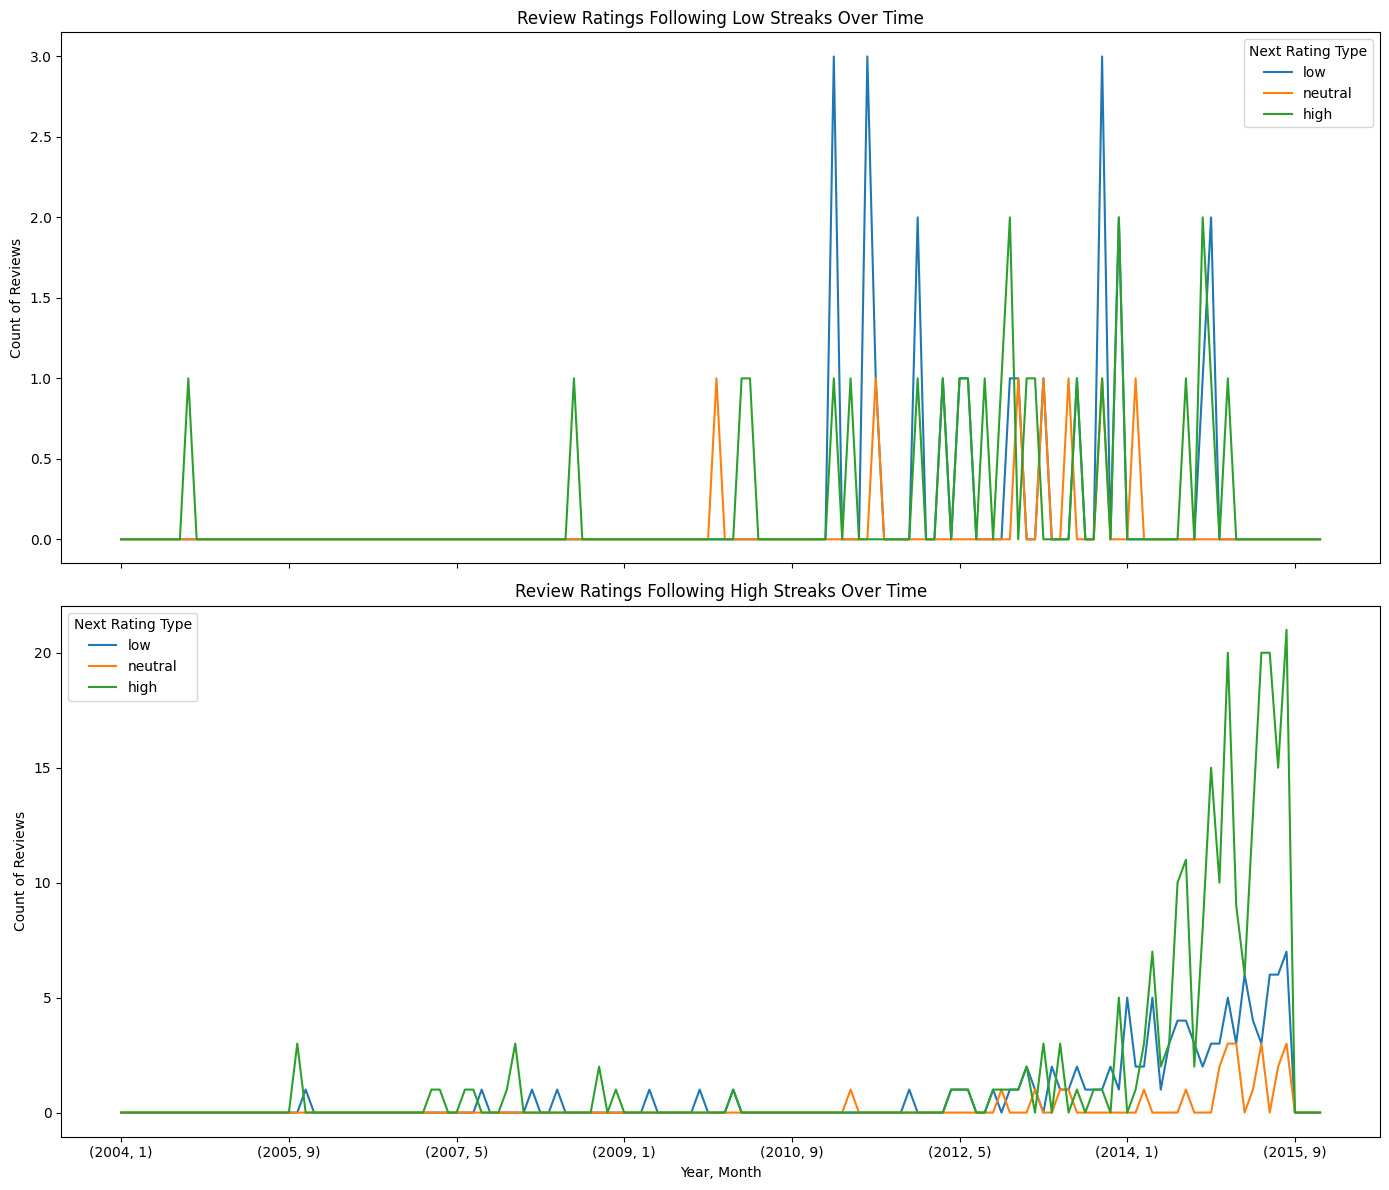

In [98]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), sharex=True)

# Plot total counts of reviews following low streaks
grouped_by_time.xs((True, False), level=('low_streak', 'high_streak'))[['low', 'neutral', 'high']].plot(
    ax=axs[0], title='Review Ratings Following Low Streaks Over Time'
)
axs[0].set_ylabel('Count of Reviews')
axs[0].legend(title='Next Rating Type')

# Plot total counts of reviews following high streaks
grouped_by_time.xs((False, True), level=('low_streak', 'high_streak'))[['low', 'neutral', 'high']].plot(
    ax=axs[1], title='Review Ratings Following High Streaks Over Time'
)
axs[1].set_xlabel('Year, Month')
axs[1].set_ylabel('Count of Reviews')
axs[1].legend(title='Next Rating Type')

plt.tight_layout()
plt.show()

## Correlation Conclusion Notes
- **Hair Dryer**
    - It is clear that the correlation between total number of star ratings and total number of reviews is very high (0.99)
    - In both of the cases, high ratings have more impact over the number of reviews compared to low ratings 